

































































##Election data prediction of votes given to party .

You are hired by one of the leading news channel CNBE who wants to analyze recent elections. This survey was conducted on 1525 voters with 9 variables. You have to build a model, to predict which party a voter will vote for on the basis of the given information, to create an exit poll that will help in predicting overall win and seats covered by a particular party.

Dataset for Problem: Election_Data.xlsx

Import the necessary Libraries

In [ ]:
import pandas as pd
import numpy as np
# For preprocessing the data
from sklearn import preprocessing
# To split the dataset into train and test datasets
from sklearn.model_selection import train_test_split
# To model the Gaussian Navie Bayes classifier
from sklearn.naive_bayes import GaussianNB
# To calculate the accuracy score of the model
from sklearn.metrics import accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import zscore
import warnings 
warnings.filterwarnings( "ignore")
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
import scipy.stats as stats

Load the data set

In [ ]:
df = pd.read_excel('/content/drive/MyDrive/Smita/Google Drive/Great Learning/Module _Projects_GL/Machine Learning/Election_Data.xlsx', sheet_name = 'Election_Dataset_Two Classes')


Checking the Top Five Records

Lets start the exploratory data anlaysis step with head method to look at the first five rows.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df.head(5)

,Unnamed: 0,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
0,1,Labour,43,3,3,4,1,2,2,female
1,2,Labour,36,4,4,4,4,5,2,male
2,3,Labour,35,4,4,5,2,3,2,male
3,4,Labour,24,4,2,2,1,4,0,female
4,5,Labour,41,2,2,1,1,6,2,male


A quick look at the dataset and data dictionary tells us that independent variables consist of six ordinal categorical variables,one nominal categorical variable and one continous variable(integer).
Also all categorical variables  except 'gender'are encoded (i.e.have numerical variables).
The target variables is a Binary categorical variables(nominal).


In [ ]:

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


We found one redundant column "Unnamed:0" which serves as an index .
We shall drop the column as pandas automatically assign an index to the data set.

In [ ]:
df.drop(['Unnamed: 0'],axis=1,inplace=True)


In [ ]:
df.head()

,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
0,Labour,43,3,3,4,1,2,2,female
1,Labour,36,4,4,4,4,5,2,male
2,Labour,35,4,4,5,2,3,2,male
3,Labour,24,4,2,2,1,4,0,female
4,Labour,41,2,2,1,1,6,2,male


The columns of data sets are checked using df.columns

In [ ]:
df.columns

Index(['vote', 'age', 'economic.cond.national', 'economic.cond.household',
       'Blair', 'Hague', 'Europe', 'political.knowledge', 'gender'],
      dtype='object')

The dataset has 9 columns: 'vote', 'age', 'economic.cond.national', 'economic.cond.household',
'Blair', 'Hague', 'Europe', 'political.knowledge', 'gender'respectively

Checking for Duplicates values

On checking for any duplicate values ,we find that we have eight duplicated rows.We remove them using the drop_duplicates method of Data Frame.So our numbers of rows is reduced to 1517(1525-8=1517).


In [ ]:
dups=df.duplicated().sum()
dups

8

In [ ]:
df.drop_duplicates(inplace=True)

In [ ]:
dups=df.duplicated().sum()
dups

0

On checking for any duplicate values ,we find that we have eight duplicated rows.We remove them using the drop_duplicates method of Data Frame.So our numbers of rows is reduced to 1517(1525-8=1517).

Data Inspection

In [ ]:
df.shape

(1517, 9)

Dataset has 1525 rows and 9 features (after removing the redundant index).Out of which vote is dependent variable and rest 8 are independent variables — physico-chemical characteristics.

Lets now use info() and describe() methods of teh DataFrame

Data Information

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1517 entries, 0 to 1524
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   vote                     1517 non-null   object
 1   age                      1517 non-null   int64 
 2   economic.cond.national   1517 non-null   int64 
 3   economic.cond.household  1517 non-null   int64 
 4   Blair                    1517 non-null   int64 
 5   Hague                    1517 non-null   int64 
 6   Europe                   1517 non-null   int64 
 7   political.knowledge      1517 non-null   int64 
 8   gender                   1517 non-null   object
dtypes: int64(7), object(2)
memory usage: 118.5+ KB


The data has no null values with  integers variables and only 2 as object variables.

Statistical Description of Data

In [ ]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
vote,1517,2,Labour,1057,NaN,NaN,NaN,NaN,NaN,NaN,NaN
age,1517,NaN,NaN,NaN,54.2413,15.7017,24,41,53,67,93
economic.cond.national,1517,NaN,NaN,NaN,3.24522,0.881792,1,3,3,4,5
economic.cond.household,1517,NaN,NaN,NaN,3.13777,0.931069,1,3,3,4,5
Blair,1517,NaN,NaN,NaN,3.33553,1.17477,1,2,4,4,5
Hague,1517,NaN,NaN,NaN,2.74951,1.23248,1,2,2,4,5
Europe,1517,NaN,NaN,NaN,6.74028,3.29904,1,4,6,10,11
political.knowledge,1517,NaN,NaN,NaN,1.54054,1.08442,0,0,2,2,3
gender,1517,2,female,808,NaN,NaN,NaN,NaN,NaN,NaN,NaN


We found that the mean of age variables is quite high (54.24 years) and the minimum age for voting seems to be 24 years means the opinion of younger people is not considered in the study.

The mean and median of all variables are almost same so data seems to be normally distributed.

In [ ]:
df['vote'].unique()

array(['Labour', 'Conservative'], dtype=object)

In [ ]:
df['age'].unique()

array([43, 36, 35, 24, 41, 47, 57, 77, 39, 70, 66, 59, 51, 79, 37, 38, 53,
       44, 60, 56, 61, 55, 62, 76, 27, 52, 48, 72, 42, 54, 50, 46, 33, 58,
       64, 32, 71, 28, 34, 68, 67, 88, 40, 78, 65, 74, 82, 49, 84, 81, 45,
       69, 31, 63, 89, 83, 29, 92, 73, 75, 26, 90, 25, 80, 30, 86, 85, 87,
       93, 91])

In [ ]:

df['economic.cond.national'].unique()

array([3, 4, 2, 1, 5])

In [ ]:
df['economic.cond.household'].unique()

array([3, 4, 2, 1, 5])

In [ ]:
df['Blair'].unique()

array([4, 5, 2, 1, 3])

In [ ]:
df['Hague'].unique()

array([1, 4, 2, 5, 3])

In [ ]:
df['Europe'].unique()

array([ 2,  5,  3,  4,  6, 11,  1,  7,  9, 10,  8])

In [ ]:
df['political.knowledge'].unique()

array([2, 0, 3, 1])

In [ ]:
df['gender'].unique()

array(['female', 'male'], dtype=object)

Skewness in data

In [ ]:
df.skew()

age                        0.139800
economic.cond.national    -0.238474
economic.cond.household   -0.144148
Blair                     -0.539514
Hague                      0.146191
Europe                    -0.141891
political.knowledge       -0.422928
dtype: float64

Check the null values

In [ ]:
df.isnull().sum()

vote                       0
age                        0
economic.cond.national     0
economic.cond.household    0
Blair                      0
Hague                      0
Europe                     0
political.knowledge        0
gender                     0
dtype: int64

It seems there are no missing values in data .Fair enough to go ahead.

Percentage of null values in data

In [ ]:
percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
percent

gender                     0.0
political.knowledge        0.0
Europe                     0.0
Hague                      0.0
Blair                      0.0
economic.cond.household    0.0
economic.cond.national     0.0
age                        0.0
vote                       0.0
dtype: float64

Check Data Types:

In [ ]:
df.dtypes.value_counts()

int64     7
object    2
dtype: int64

The dataset contains  7 integers and 2 objects in total. 
The info function shows 2 columns are of type object i.e. strings.
These need to be converted to ordinal type.
The following code loops through each column and checks if the column type is object then converts those
columns into categorical with each distinct value becoming a category.


Making different list for categorical columns and numerical columns

In [ ]:
cat=[]
num=[]
for i in df.columns:
    if df[i].dtype=="object":
        cat.append(i)
    else:
        num.append(i)
print(cat) 
print(num)

['vote', 'gender']
['age', 'economic.cond.national', 'economic.cond.household', 'Blair', 'Hague', 'Europe', 'political.knowledge']


Let’s try to test whether any categorical attribute contains a “?” in it or not. At times there exists “?” or ” ” in place of missing values. Using the below code snippet we are going to test whether df data frame consists of categorical variables with values as “?”.

In [ ]:
for variable in cat:
    print(variable,":", sum(df[variable] == '?'))

vote : 0
gender : 0


The output of the above code snippet shows that there are not any  "?" or " " present in the data set

Unique values for categorical variables

In [ ]:
for column in df.columns:
    if df[column].dtype == 'object':
        print(column.upper(),': ',df[column].nunique())
        print(df[column].value_counts().sort_values())
        print('\n')

VOTE :  2
Conservative     460
Labour          1057
Name: vote, dtype: int64


GENDER :  2
male      709
female    808
Name: gender, dtype: int64




Checking for outliers

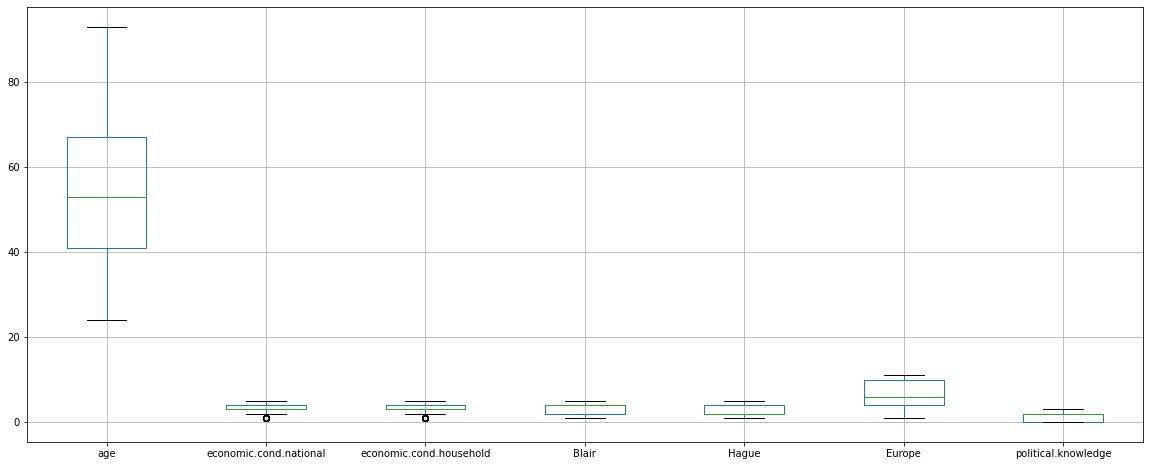

In [ ]:
# continuous=df.dtypes[(df.dtypes=='int64')|(df.dtypes=='float64')].index
# data_plot=df[continuous]

# data_plot.boxplot(figsize=(15,10), rot=45);
plt.figure(figsize=(20,8))
df.boxplot()

Plot the pairplot with hue="vote for the data.

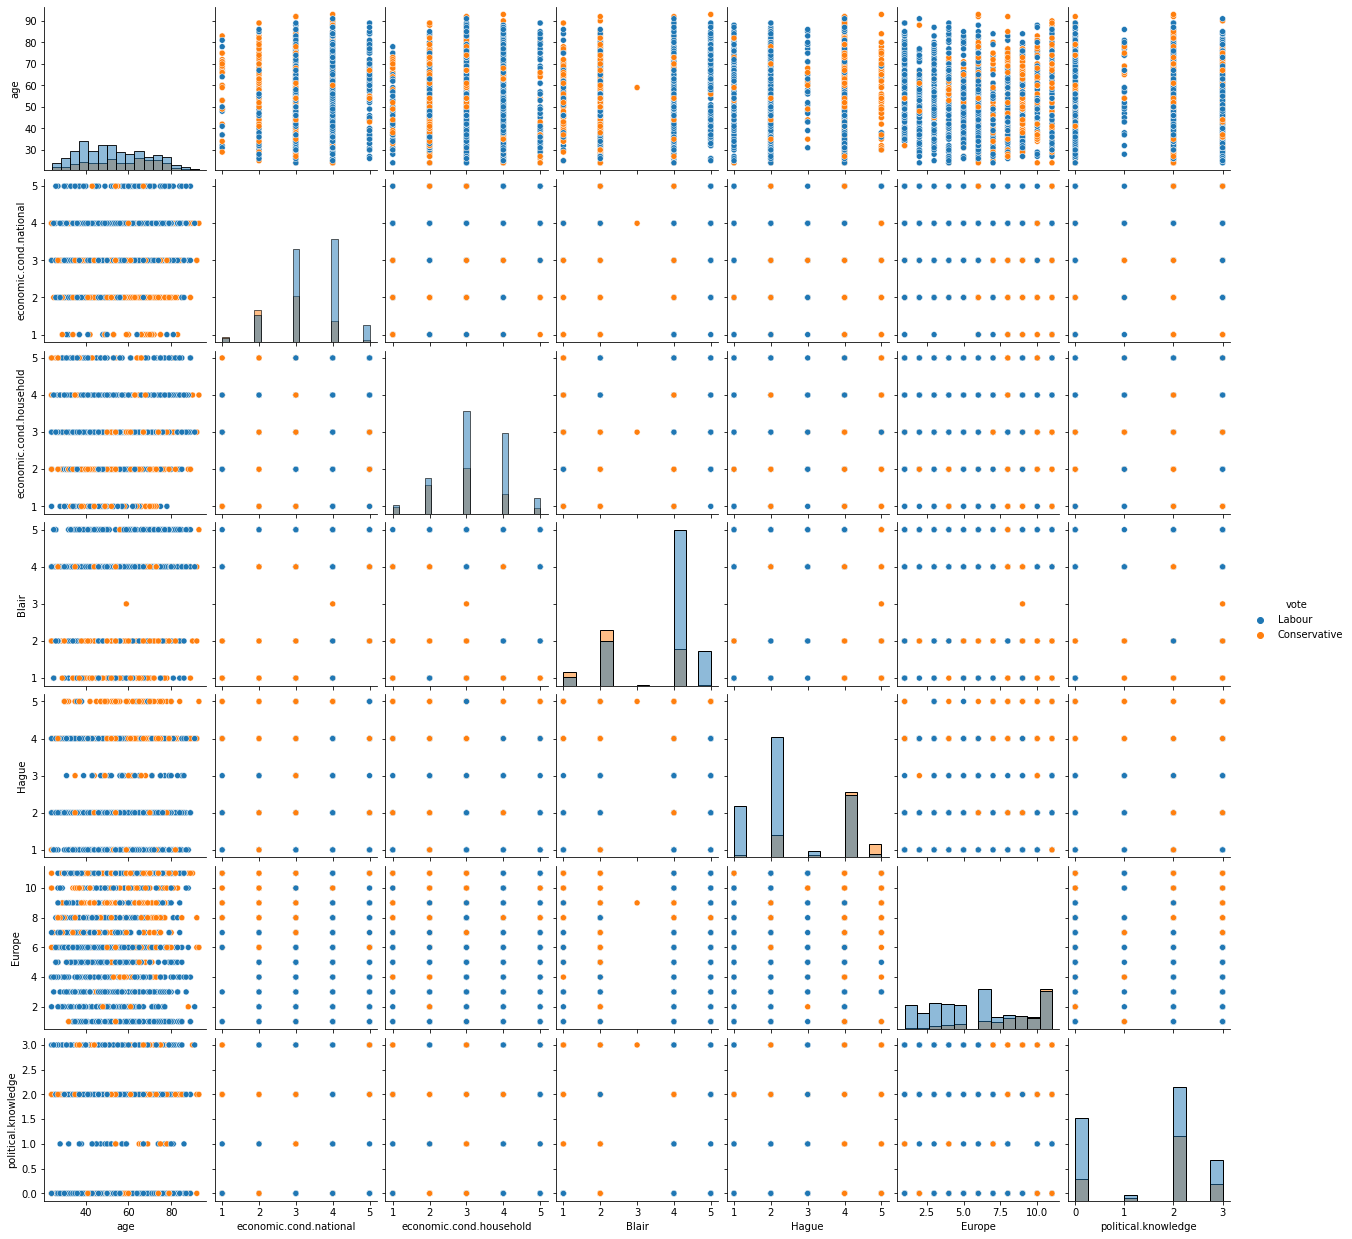

In [ ]:
# Pairplot using sns
sns.pairplot(df ,diag_kind='hist',hue='vote');

Visualization of data(Pairplot)


Correleation using corr() and heatmap using seaborn library

Observe the association of each independent variable with target variable by checking the .corr() and make a heatmap/correlation plot

In [ ]:
df.corr()

,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge
age,1.000000,0.018687,-0.038868,0.032084,0.031144,0.064562,-0.046598
economic.cond.national,0.018687,1.000000,0.347687,0.326141,-0.200790,-0.209150,-0.023510
economic.cond.household,-0.038868,0.347687,1.000000,0.215822,-0.100392,-0.112897,-0.038528
Blair,0.032084,0.326141,0.215822,1.000000,-0.243508,-0.295944,-0.021299
Hague,0.031144,-0.200790,-0.100392,-0.243508,1.000000,0.285738,-0.029906
Europe,0.064562,-0.209150,-0.112897,-0.295944,0.285738,1.000000,-0.151197
political.knowledge,-0.046598,-0.023510,-0.038528,-0.021299,-0.029906,-0.151197,1.000000


Get the Correlation Heatmap

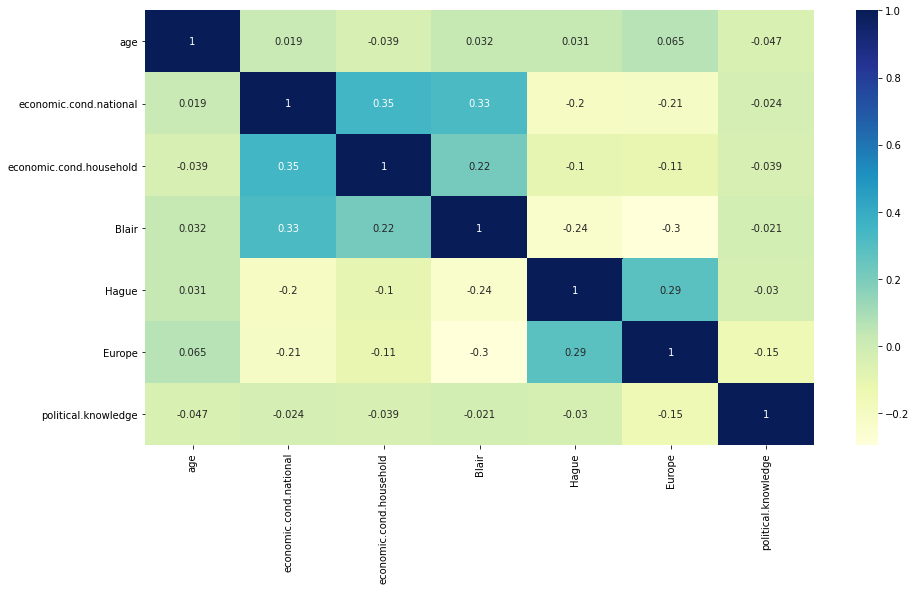

In [ ]:
plt.figure(figsize=(15,8))
sns.heatmap(df.corr(),annot=True,cmap='YlGnBu')
plt.show()


##Data Preparation:

# Encoding data

We encode the "gender" variable by using get_dummies () and dropping the first column to make sure we dont have a pair of colinear variables in our data set.
We will also manually encode the "vote"variable.

Scaling of variables is optional for linear models such as linaer Regression,Logistic Regression ,LDA and tree based model as Random forest.

However,scaling is a neccesity when using Distance based models such as KNN and SVM because we do not want variables with greater numerical values to be given more importance by the model.

Scaling is always done after train test spit meaning the parameters(mean,min-max) learned from train set to be applied to the scale the test set to make sure that the test data set is unseen during the training phase.
As none of the features follows a normal distribution,we can use Min-Max scaler for this data set.


 Label Encoding refers to converting the labels into numeric form so as to convert it into the machine-readable form.
    The following code loops through each column and checks if the column type is object then converts those columns into categorical with each distinct value becoming a category.

In [ ]:
for feature in df.columns: 
    if df[feature].dtype == 'object': 
        df[feature] = pd.Categorical(df[feature]).codes

In [ ]:
df.head()

,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
0,1,43,3,3,4,1,2,2,0
1,1,36,4,4,4,4,5,2,1
2,1,35,4,4,5,2,3,2,1
3,1,24,4,2,2,1,4,0,0
4,1,41,2,2,1,1,6,2,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1517 entries, 0 to 1524
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   vote                     1517 non-null   int8 
 1   age                      1517 non-null   int64
 2   economic.cond.national   1517 non-null   int64
 3   economic.cond.household  1517 non-null   int64
 4   Blair                    1517 non-null   int64
 5   Hague                    1517 non-null   int64
 6   Europe                   1517 non-null   int64
 7   political.knowledge      1517 non-null   int64
 8   gender                   1517 non-null   int8 
dtypes: int64(7), int8(2)
memory usage: 97.8 KB


Observe the independent variables variance and check for variables having no variance or almost zero variance(variance < 0.1). They will be having almost no influence on the classification.

In [ ]:
df.var()

vote                         0.211421
age                        246.544655
economic.cond.national       0.777558
economic.cond.household      0.866890
Blair                        1.380089
Hague                        1.519005
Europe                      10.883687
political.knowledge          1.175961
gender                       0.249099
dtype: float64

After encoding data using pd.Categorical().We can see now all data types are int type.

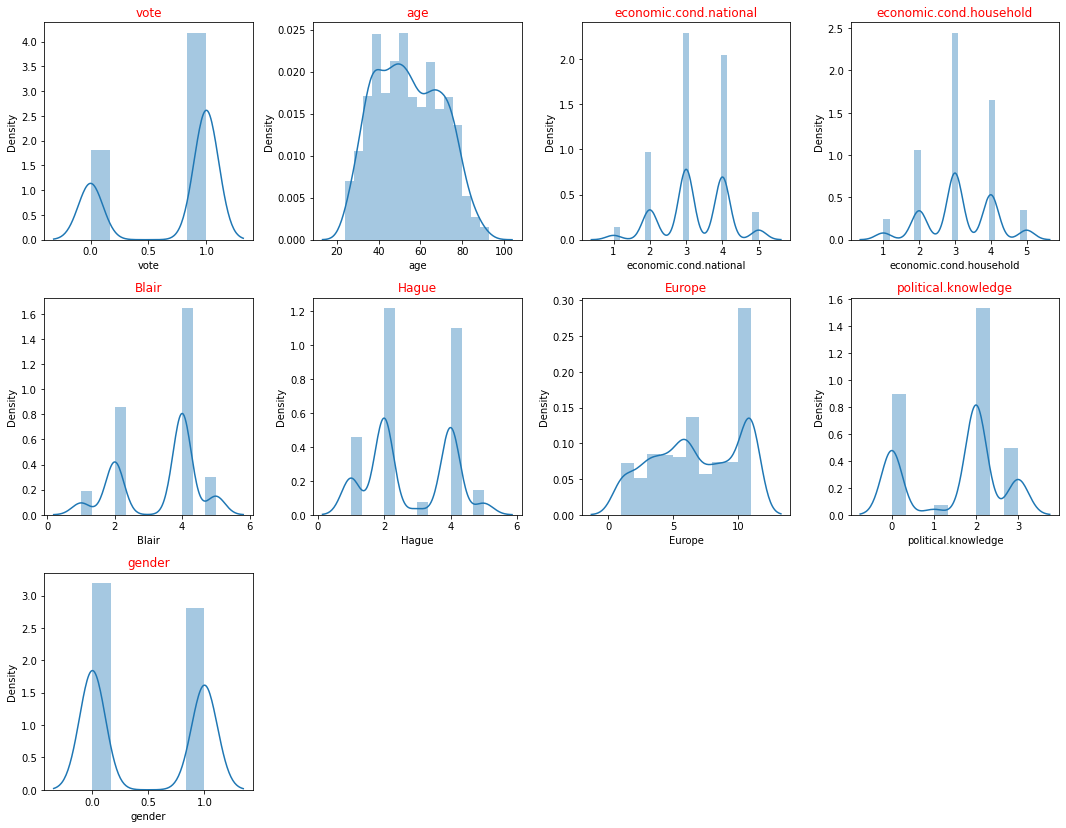

In [ ]:
data_plot=df
fig=plt.figure(figsize=(15,15))
for i in range (0,len(df.columns)):
    ax=fig.add_subplot(4,4,i+1)
    sns.distplot(df[df.columns[i]],hist=True)
    ax.set_title(df.columns[i],color='Red')
plt.tight_layout()
plt.show()
# hist=True we get both histogram and distplot but when hist=False we get only distplots

Univariate Analysis

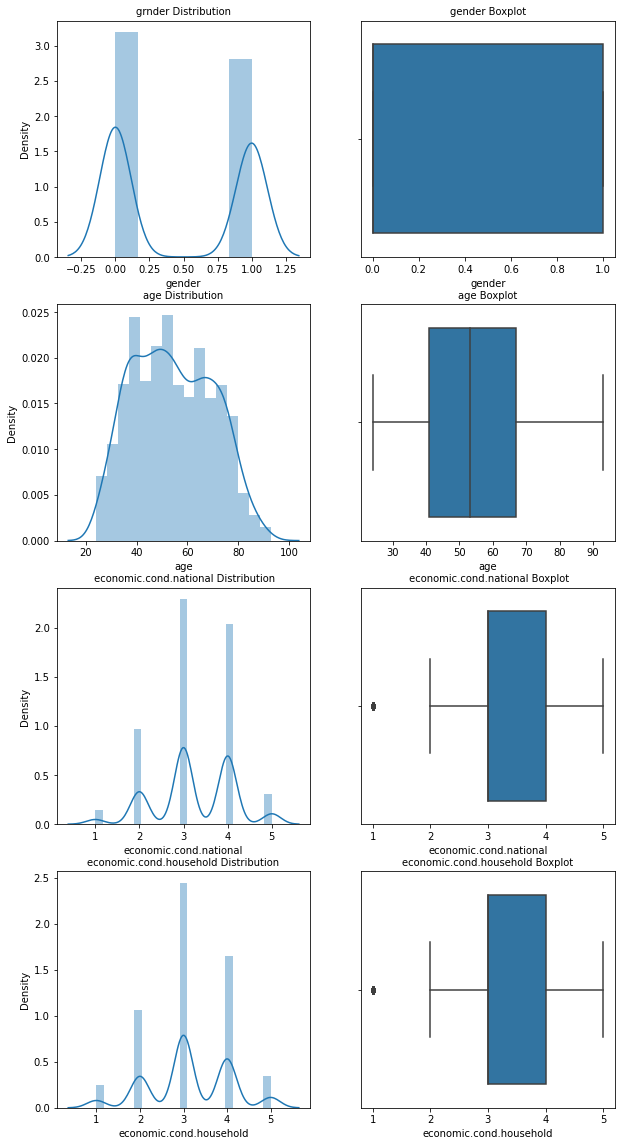

In [ ]:
fig, axes = plt.subplots(nrows=4,ncols=2)
fig.set_size_inches(10,20)
a = sns.distplot(df['gender'] , ax=axes[0][0])
a.set_title("grnder Distribution",fontsize=10)

a = sns.boxplot(df['gender'] , orient = "v" , ax=axes[0][1])
a.set_title("gender Boxplot",fontsize=10)

a = sns.distplot(df['age'],ax=axes[1][0])
a.set_title("age Distribution",fontsize=10)

a = sns.boxplot(df['age'],orient= "v",ax=axes[1][1])
a.set_title("age Boxplot",fontsize=10)


a = sns.distplot(df['economic.cond.national'] , ax=axes[2][0])
a.set_title(" economic.cond.national Distribution",fontsize=10)

a = sns.boxplot(df['economic.cond.national'],orient = "v" , ax=axes[2][1])
a.set_title(" economic.cond.national Boxplot",fontsize=10)


a = sns.distplot(df['economic.cond.household'],ax=axes[3][0])
a.set_title("economic.cond.household Distribution",fontsize=10)

a = sns.boxplot(df['economic.cond.household'],orient = "v" , ax=axes[3][1])
a.set_title("economic.cond.household Boxplot",fontsize=10)

plt.show()

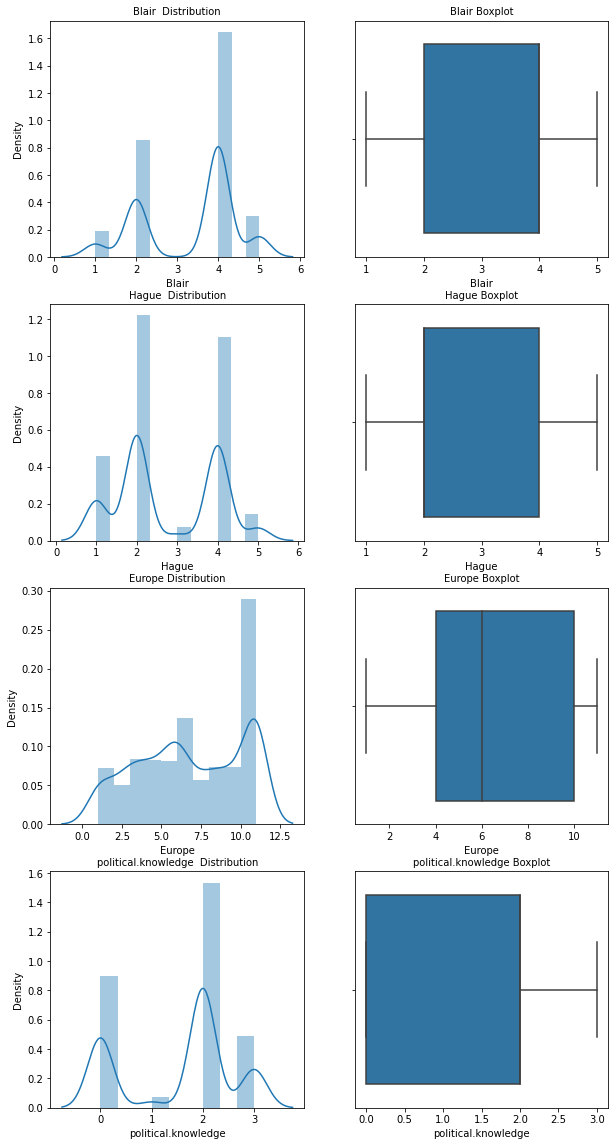

In [ ]:
fig, axes = plt.subplots(nrows=4,ncols=2)
fig.set_size_inches(10,20)
a = sns.distplot(df['Blair'],ax=axes[0][0])
a.set_title("Blair  Distribution",fontsize=10)

a = sns.boxplot(df['Blair'] ,orient = "v" , ax=axes[0][1])
a.set_title("Blair Boxplot",fontsize=10)

a = sns.distplot(df['Hague'],ax=axes[1][0])
a.set_title("Hague  Distribution",fontsize=10)

a = sns.boxplot(df['Hague'],orient= "v",ax=axes[1][1])
a.set_title("Hague Boxplot",fontsize=10)


a = sns.distplot(df['Europe'] , ax=axes[2][0])
a.set_title("Europe Distribution",fontsize=10)

a = sns.boxplot(df['Europe'],orient = "v" , ax=axes[2][1])
a.set_title("Europe Boxplot",fontsize=10)


a = sns.distplot(df['political.knowledge'],ax=axes[3][0])
a.set_title("political.knowledge  Distribution",fontsize=10)

a = sns.boxplot(df['political.knowledge'],orient = "v" , ax=axes[3][1])
a.set_title("political.knowledge Boxplot",fontsize=10)

plt.show()


In [ ]:
# Bivariate and Multivariate Analysis

In [ ]:
print(num)

['age', 'economic.cond.national', 'economic.cond.household', 'Blair', 'Hague', 'Europe', 'political.knowledge']


In [ ]:
print(cat)

['vote', 'gender']


In [ ]:
df['vote'].value_counts()

1    1057
0     460
Name: vote, dtype: int64

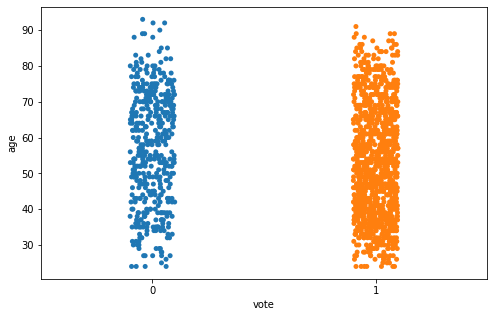

In [ ]:
plt.figure(figsize=(8,5))
sns.stripplot(df["vote"], df['age'], jitter=True) 
plt.show()

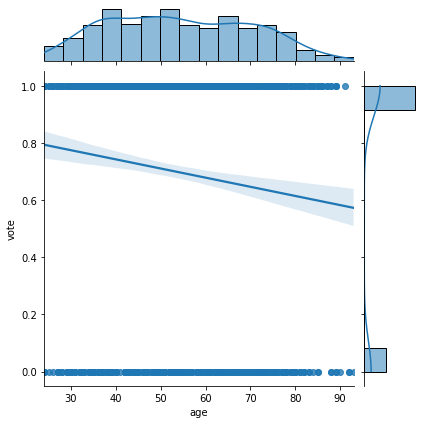

In [ ]:
sns.jointplot(df['age'],df['vote'],kind='reg')
plt.show()

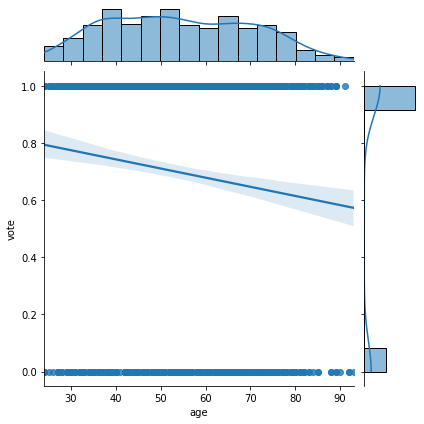

In [ ]:
sns.jointplot(df['age'],df['vote'],kind='reg')
plt.show()

Younger people have less probability of voting . This pattern is clearly visible, 
However probability of voting is low even for old age people, as per the above strip plot.

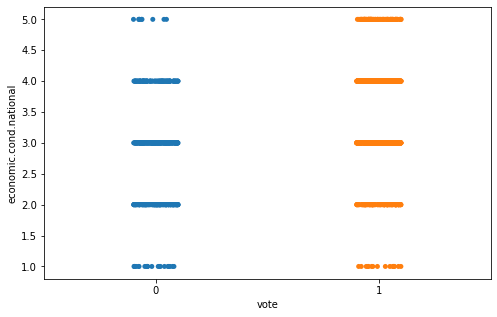

In [ ]:
plt.figure(figsize=(8,5))
sns.stripplot(df["vote"], df['economic.cond.national'], jitter=True) 
plt.show()

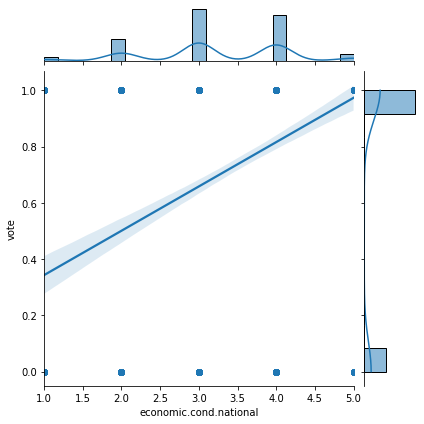

In [ ]:
sns.jointplot(df['economic.cond.national'],df['vote'],kind='reg')
plt.show()

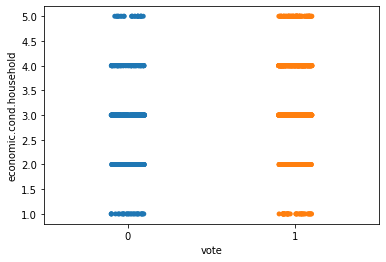

In [ ]:

sns.stripplot(df['vote'], df['economic.cond.household'], jitter=True) 
plt.show()
                          

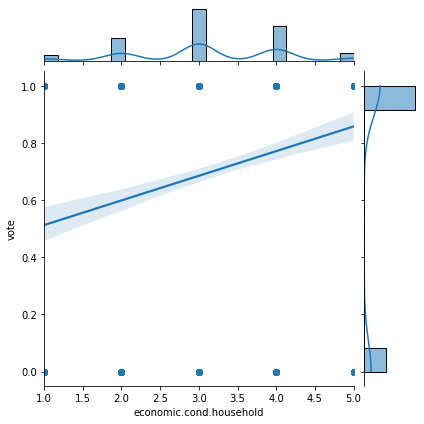

In [ ]:
sns.jointplot(df['economic.cond.household'],df['vote'],kind='reg')
plt.show()

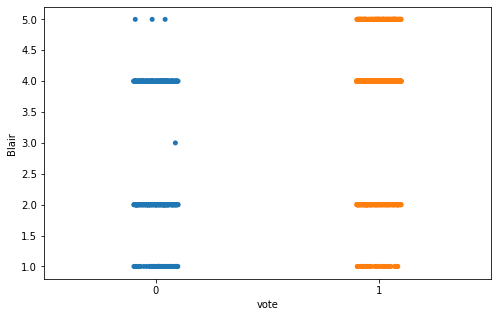

In [ ]:

plt.figure(figsize=(8,5))
sns.stripplot(df["vote"], df['Blair'], jitter=True) 
plt.show()

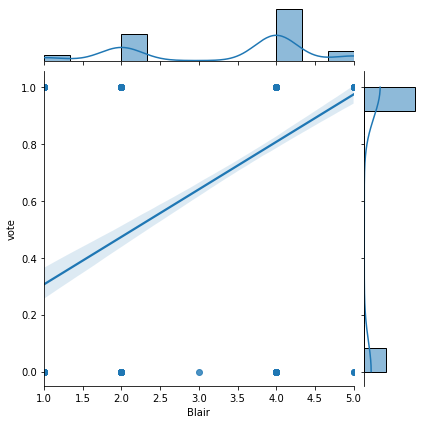

In [ ]:
sns.jointplot(df['Blair'],df['vote'],kind='reg')
plt.show()


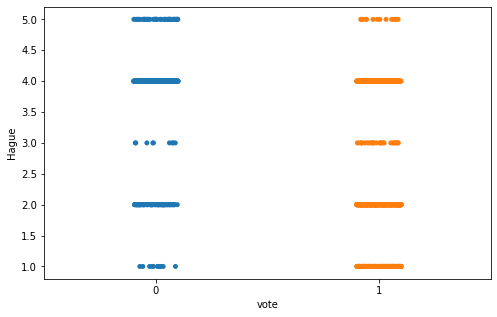

In [ ]:
plt.figure(figsize=(8,5))
sns.stripplot(df["vote"], df['Hague'], jitter=True) 
plt.show()

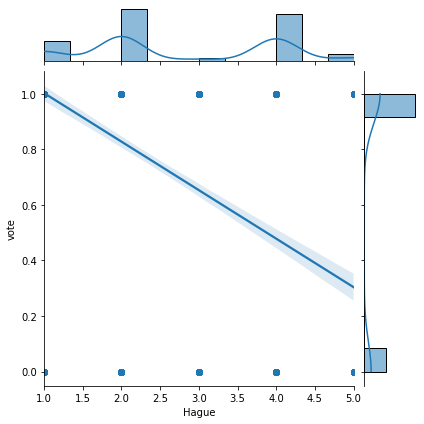

In [ ]:
sns.jointplot(df['Hague'],df['vote'],kind='reg')
plt.show()

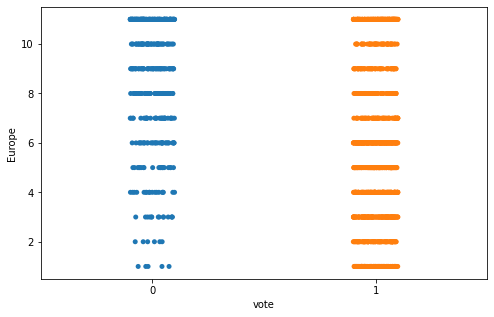

In [ ]:
plt.figure(figsize=(8,5))
sns.stripplot(df["vote"], df['Europe'], jitter=True) 
plt.show()

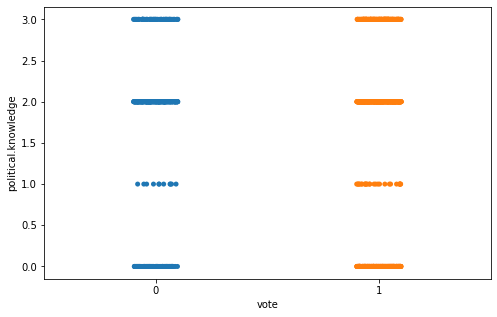

In [ ]:
plt.figure(figsize=(8,5))
sns.stripplot(df["vote"], df['political.knowledge'], jitter=True) 
plt.show()

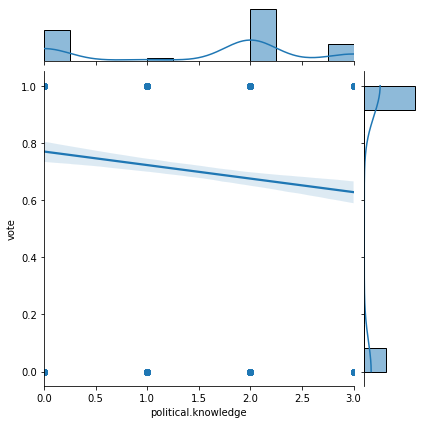

In [ ]:
sns.jointplot(df['political.knowledge'],df['vote'],kind='reg')
plt.show()

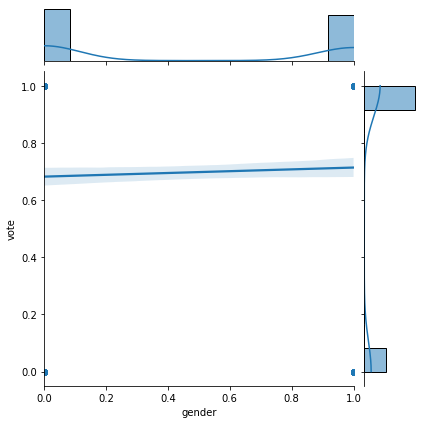

In [ ]:
sns.jointplot(df['gender'],df['vote'],kind='reg')
plt.show()

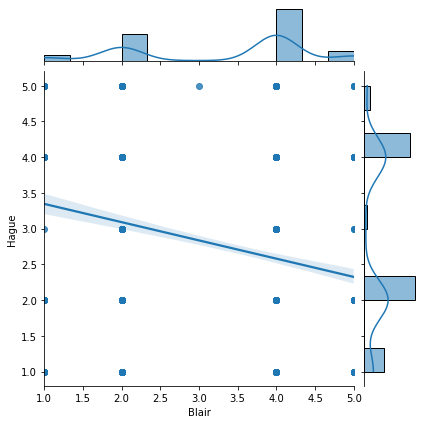

In [ ]:
sns.jointplot(df['Blair'],df['Hague'],kind='reg')
plt.show()

Count plot of Categorical Variables

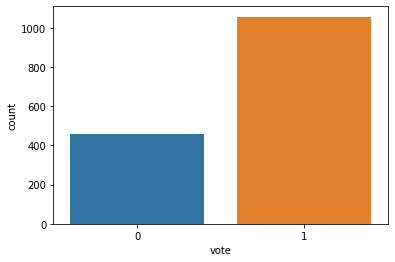

In [ ]:
sns.countplot(x ='vote', data = df)

In [ ]:
df.vote.value_counts()

1    1057
0     460
Name: vote, dtype: int64

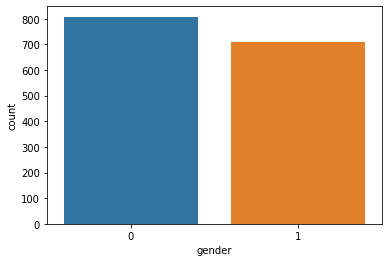

In [ ]:
sns.countplot(x ='gender', data = df)

In [ ]:
df.gender.value_counts()

0    808
1    709
Name: gender, dtype: int64

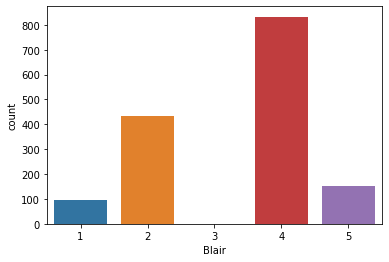

In [ ]:
sns.countplot(x ='Blair', data = df)

In [ ]:
df.Blair.value_counts()

4    833
2    434
5    152
1     97
3      1
Name: Blair, dtype: int64

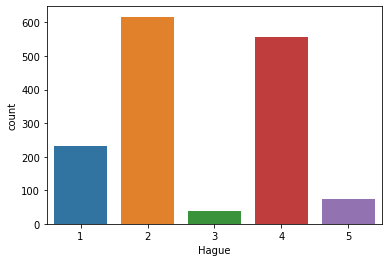

In [ ]:
sns.countplot(x ='Hague', data = df)

In [ ]:
df.Hague.value_counts()

2    617
4    557
1    233
5     73
3     37
Name: Hague, dtype: int64

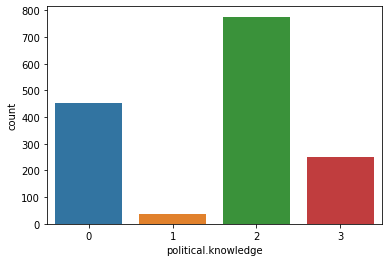

In [ ]:
sns.countplot(x ='political.knowledge', data = df)

In [ ]:
df['political.knowledge'].value_counts()

2    776
0    454
3    249
1     38
Name: political.knowledge, dtype: int64

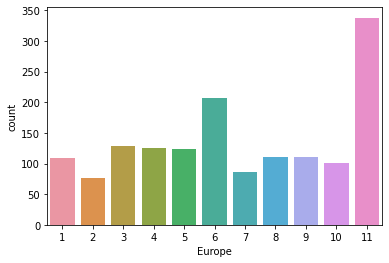

In [ ]:
sns.countplot(x ='Europe', data = df)

In [ ]:
df['Europe'].value_counts()

11    338
6     207
3     128
4     126
5     123
9     111
8     111
1     109
10    101
7      86
2      77
Name: Europe, dtype: int64

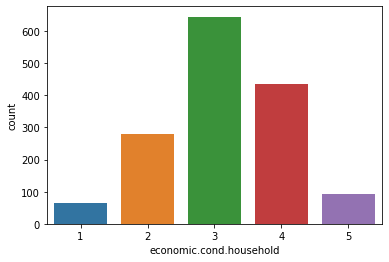

In [ ]:
sns.countplot(x ='economic.cond.household', data = df)

In [ ]:
df['economic.cond.household'].value_counts()

3    645
4    435
2    280
5     92
1     65
Name: economic.cond.household, dtype: int64

In [ ]:
df.kurtosis()

vote                      -1.267200
age                       -0.943708
economic.cond.national    -0.256575
economic.cond.household   -0.209035
Blair                     -1.060248
Hague                     -1.395161
Europe                    -1.236843
political.knowledge       -1.222260
gender                    -1.985477
dtype: float64

Inferences on Univariate Analysis :

1.No outliers present in 'age' variables(As evident from the box plot).
2.'Age' does not follow normal distribution and Kurtosis of -0.94 which implies too flat distribution (k=0 Normal distribution).
3.Dependent variable 'vote' has ahigher proportion of 'Labour' over "Conservative".
4.Economic conditions of Household and national level follow distribution as per the common knowledge.
5.The plots of 'Hague' and 'Blair' suggest that very few people have neutral opinions.'Blair' has more positive opinions ,whereas 'Hague' has more negative.
6.'Europe' variable has good proportions of all categories,only 11 being an exception.
7.'Gender' variable has an almost equal proportion of male and female observations.


Bivariate Analysis:

Vote vs categorical variables countplots

 Box plot of Age vs Votes

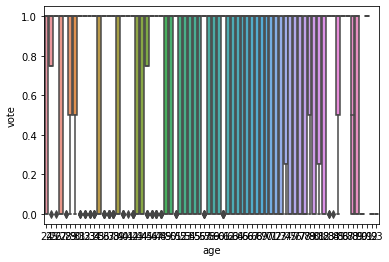

In [ ]:
sns.boxplot(x = df['age'],y = df['vote'])
            
           

Count Plot of Economic .cond.national vs Vote

Economic cond national vs Vote plot

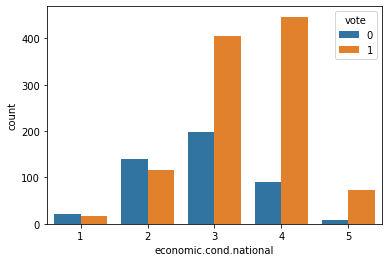

In [ ]:
sns.countplot(x='economic.cond.national',hue='vote', data=df)

Economic cond household vs Vote plot

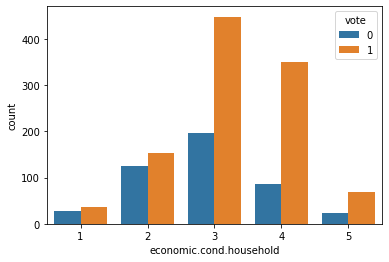

In [ ]:
sns.countplot(x='economic.cond.household',hue='vote', data=df)

Gender vs Vote Plot

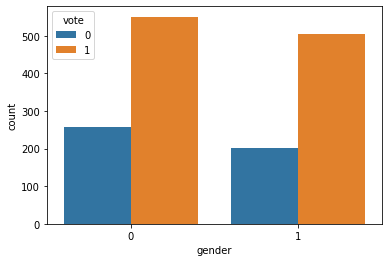

In [ ]:
sns.countplot(x='gender',hue='vote', data=df)

Political Knowledge vs Vote plot

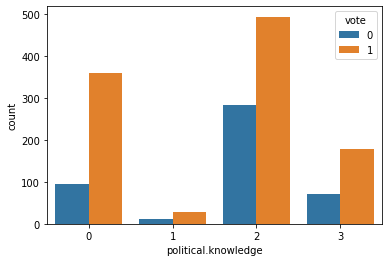

In [ ]:
sns.countplot(x='political.knowledge',hue='vote', data=df)

Europe  vs Vote plot

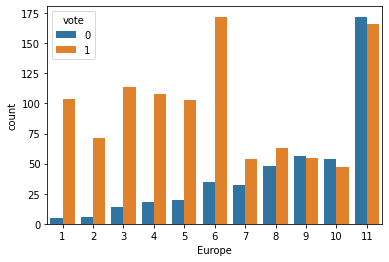

In [ ]:
sns.countplot(x='Europe',hue='vote', data=df)

Hague vs Vote Plot

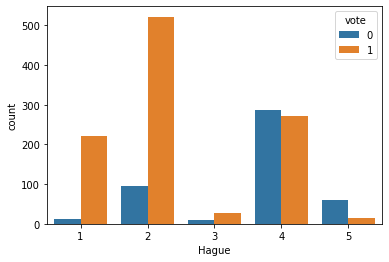

In [ ]:
sns.countplot(x='Hague',hue='vote', data=df)

Blair vs Vote Plot

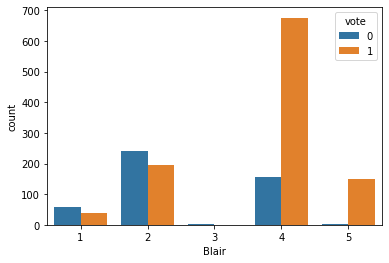

In [ ]:
sns.countplot(x='Blair',hue='vote', data=df)

Inferences from Bivariate Analysis:
1.Elder people(60+) tend to vote for 'Conservative" party (As clear from the box plot).
2.People who have have lower assessments for economic conditions both nationals and households tend to vote for "Conservative" party.
3.An almost equal number of voters across genders.
4.People with stronger eurospectic sentiments tends to vote for "Conservative" party.
5.Hague belongs to "Conservative" party while"Blair" is in "Labour" party.


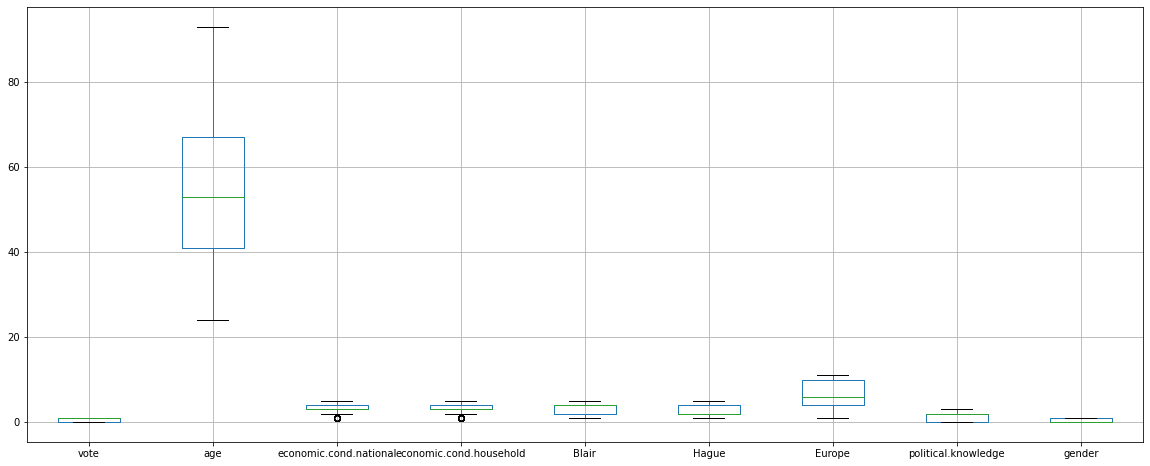

In [ ]:
# continuous=df.dtypes[(df.dtypes=='int64')|(df.dtypes=='float64')].index
# data_plot=df[continuous]

# data_plot.boxplot(figsize=(15,10), rot=45);
plt.figure(figsize=(20,8))
df.boxplot()

It seems there are outliers in variables like economic. cond. national and economic. cond. household in data sets. We need to treat it.

Outlier Treatment:
Outlier Treatment Created a user defined function for finding the lower and upper range for a variable so that outlier can be treated. Imputation of Data: As outliers are present in the data, we will do impute the outliers with median () and categorical variable are imputed with mode (). After imputation we see the outliers are mostly treated in data. Very small number of outliers are present, which is also not significant as it will not affect much on Predictions.


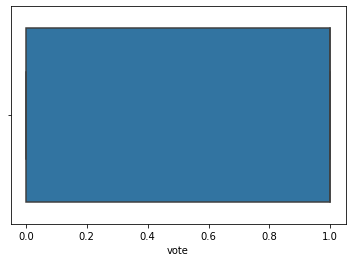

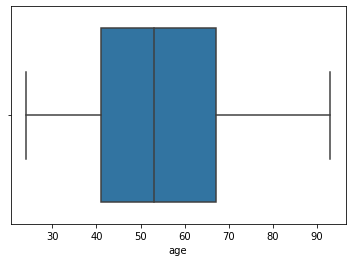

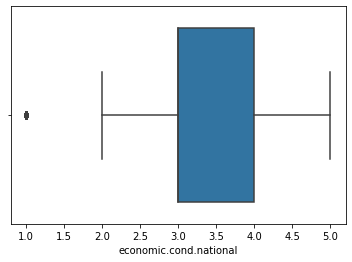

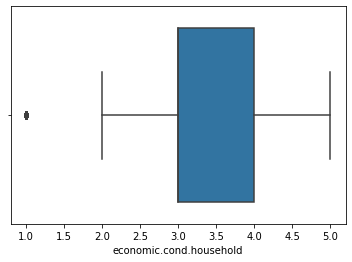

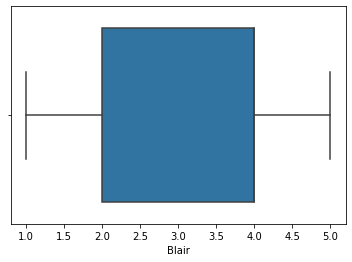

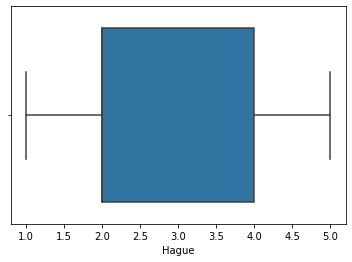

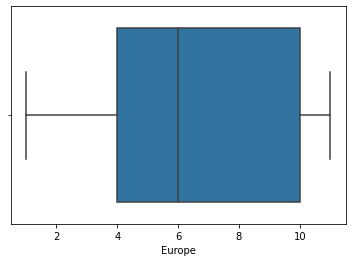

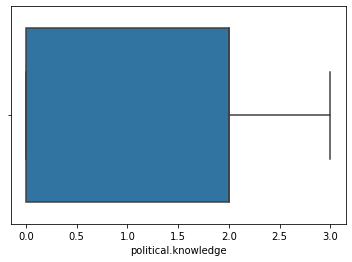

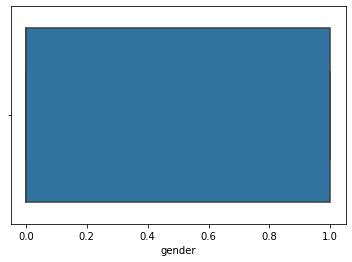

In [ ]:
cols=['vote', 'age', 'economic.cond.national', 'economic.cond.household',
       'Blair', 'Hague', 'Europe', 'political.knowledge', 'gender'];

for i in cols:
    sns.boxplot(df[i])
    plt.show()

In [ ]:
def remove_outlier(col):
    sorted(col)
    Q1,Q3=np.percentile(col,[25,75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range

In [ ]:
for column in df[cols].columns:

    
    lr,ur=remove_outlier(df['economic.cond.national'])
    df['economic.cond.national']=np.where(df['economic.cond.national']>ur,ur,df['economic.cond.national'])
    df['economic.cond.national']=np.where(df['economic.cond.national']<lr,lr,df['economic.cond.national'])
     
    lr,ur=remove_outlier(df['economic.cond.household'])
    df['economic.cond.household']=np.where(df['economic.cond.household']>ur,ur,df['economic.cond.household'])
    df['economic.cond.household']=np.where(df['economic.cond.household']<lr,lr,df['economic.cond.household'])
    
    lr,ur=remove_outlier(df['political.knowledge'])
    df['political.knowledge']=np.where(df['political.knowledge']>ur,ur,df['political.knowledge'])
    df['political.knowledge']=np.where(df['political.knowledge']<lr,lr,df['political.knowledge'])
    

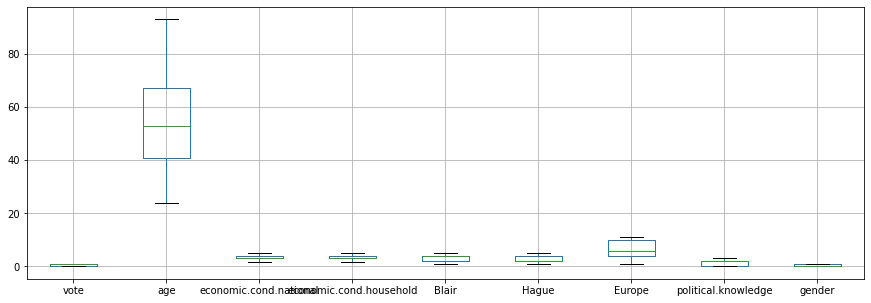

In [ ]:
plt.figure(figsize=(15,5))
df.boxplot()

There are no outliers now in data after outlier treatment 

Splitting the data into training and test set for independent attribute The next step is to split this data into training and test sets. We'll do this by using Scikit-Learn's built-in train_test_split() method:

Before doing the data split ,variable types were checked .
As there are two columns with the type as object ,these variables were converted into categorical type. 
Then target variable was captured into seperate vector for training the test data set. 
If the dataset was split into train and test in the ratio of 70:30

Proportion in the Target Column

In [ ]:
df['vote'].value_counts(normalize=True)

1    0.69677
0    0.30323
Name: vote, dtype: float64

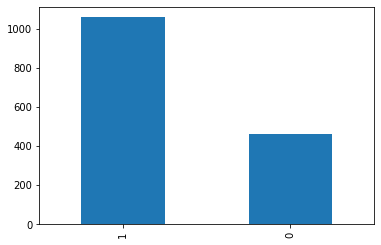

In [ ]:
df['vote'].value_counts().plot(kind='bar')

In [ ]:
df['vote'].unique()

array([1, 0], dtype=int8)

In [ ]:
df.groupby('vote').mean()

,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
vote,,,,,,,,
0,56.841304,2.864130,2.921739,2.576087,3.623913,8.663043,1.723913,0.441304
1,53.109745,3.428571,3.262535,3.666036,2.368969,5.903500,1.460738,0.478713


#1.Apply Logistic Regression Model and LDA (Linear Discriminant Model)

Train -Test Data Split

We now proceed with splitting the data set into train and test .We use the train_test_split function with arguements test_size=0.3 to get 70:30 split,random_state=100 for reproduceable results and stratify =y(target variables) so that the target variable has equal proportions of classes in train and test set.

In [ ]:
# Copy all the predictor variables into X dataframe
X = df.drop(['vote'],axis=1)

# Copy target into the y dataframe. 
y = df[['vote']]

In [ ]:
# Data Split(70:30)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
X_train_LR, X_test_LR, y_train_LR, y_test_LR = train_test_split(X, y, test_size=0.3, random_state=0)


The above script splits 70% of the data to training set while 30% of the data to test set. The test_size variable is where we actually specify the proportion of test set.

In [ ]:
print('Number of rows and columns of the training set for the independent variables:',X_train_LR.shape)
print('Number of rows and columns of the training set for the dependent variable:',y_train_LR.shape)
print('Number of rows and columns of the test set for the independent variables:',X_test_LR.shape)
print('Number of rows and columns of the test set for the dependent variable:',y_test_LR.shape)

Number of rows and columns of the training set for the independent variables: (1061, 8)
Number of rows and columns of the training set for the dependent variable: (1061, 1)
Number of rows and columns of the test set for the independent variables: (456, 8)
Number of rows and columns of the test set for the dependent variable: (456, 1)


The train set now has 1061 rows ,8 features whereas the test set has 456 rows and 8 features .

Train set Top five Rows

In [ ]:
X_train_LR.head()

,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
1373,50,3.0,2.0,2,2,11,0.0,0
252,32,3.0,2.0,5,1,6,2.0,0
412,35,4.0,3.0,4,4,11,2.0,1
549,29,4.0,3.0,4,2,4,2.0,0
250,79,3.0,3.0,5,1,11,2.0,1


Test set Top Five Rows

In [ ]:
X_test_LR.head()

,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
1229,70,3.0,3.0,2,2,5,3.0,1
581,46,3.0,3.0,2,4,6,0.0,0
9,70,3.0,2.0,5,1,11,2.0,1
688,50,2.0,4.0,2,5,11,2.0,0
687,71,3.0,3.0,2,4,5,2.0,0


Modelling:
Applying Logistic Regression and LDA(Linear Discriminant Analysis)

In [ ]:
#Import all necessary modules
import pandas as pd  ###Software library written for the Python programming language for data manipulation and analysis.
import numpy as np ### fundamental package for scientific computing with Python
import os ### using operating system dependent functionality
import scipy.stats as stats
import matplotlib.pyplot as plt 
plt.rc("font", size=14)
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import scale
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix,plot_confusion_matrix

Building Logistic Regression Model 

In [ ]:
Logistic_Model = LogisticRegression(solver='liblinear',max_iter=100,tol=0.0001,penalty ='l2',verbose = True, n_jobs=2)


Fitting the Logistic Regression model 

In [ ]:
Logistic_Model.fit(X_train_LR,y_train_LR)

[LibLinear]

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=2, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001,
                   verbose=True, warm_start=False)

Predicting on Training and Test dataset for Logistic Regression Model

In [ ]:
# training data prediction 
y_train_predict_LR=Logistic_Model.predict(X_train_LR)
# test data prediction 
y_test_prediction_LR=Logistic_Model.predict(X_test_LR)

Getting the Predicted Classes and Probs for Logistic Regression Model

In [ ]:
# Train Data
y_train_predict_prob=Logistic_Model.predict_proba(X_train_LR)

pd.DataFrame(y_train_predict_prob).head()

,0,1
0,0.406778,0.593222
1,0.026299,0.973701
2,0.369723,0.630277
3,0.035238,0.964762
4,0.092606,0.907394


In [ ]:
# Test data
y_test_predict_prob=Logistic_Model.predict_proba(X_test_LR)
pd.DataFrame(y_test_predict_prob).head()

,0,1
0,0.347264,0.652736
1,0.476919,0.523081
2,0.095796,0.904204
3,0.939045,0.060955
4,0.698962,0.301038


Evaluation metrics fro Logistic Regression Model

In [ ]:

# Accuracy of logistic regression classifier on train set: 0.831

In [ ]:
Logistic_Model_train_acc=Logistic_Model.score(X_train_LR,y_train_LR)
Logistic_Model_train_acc

0.8312912346842601

In [ ]:
# Accuracy of logistic regression classifier on test set: 0.837

In [ ]:
Logistic_Model_test_acc=Logistic_Model.score(X_test_LR,y_test_LR)
Logistic_Model_test_acc

0.8377192982456141

AUC and ROC for the training data for Logistic Regression Model

No handles with labels found to put in legend.


AUC: 0.888


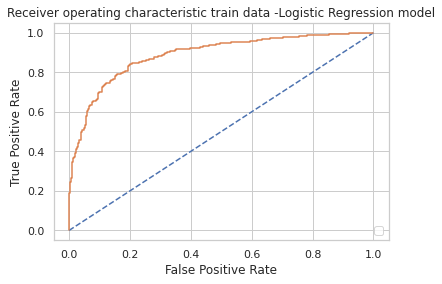

In [ ]:
# predict probabilities
probs = Logistic_Model.predict_proba(X_train_LR)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
Logist_train_auc = roc_auc_score(y_train_LR, probs)
print('AUC: %.3f' % Logist_train_auc)
# calculate roc curve
Logist_train_fpr,Logist_train_tpr,Logist_train_thresholds = roc_curve(y_train_LR, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(Logist_train_fpr, Logist_train_tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic train data -Logistic Regression model')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

AUC and ROC for the test data for Logistic Model

No handles with labels found to put in legend.


AUC: 0.891


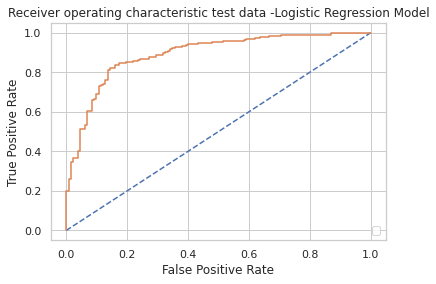

In [ ]:
# predict probabilities
probs = Logistic_Model.predict_proba(X_test_LR)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
Logist_test_auc = roc_auc_score(y_test_LR, probs)
print('AUC: %.3f' % Logist_test_auc)
# calculate roc curve
Logist_test_fpr, Logist_test_tpr, Logist_testthresholds = roc_curve(y_test_LR, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(Logist_test_fpr, Logist_test_tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic test data -Logistic Regression Model')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()


ROC-AUC Scores -
Train set:88% || Test set:89%

Confusion Matrix for the training data

In [ ]:
y_train_predict = Logistic_Model.predict(X_train_LR)
y_test_predict = Logistic_Model.predict(X_test_LR)

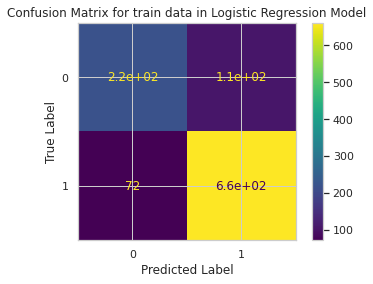

In [ ]:
plot_confusion_matrix(Logistic_Model,X_train_LR,y_train_LR)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for train data in Logistic Regression Model')
# plt.legend(loc="lower right")
# plt.savefig('Log_ROC')
plt.show()

TP-A true positive is an outcome where the model correctly predicts the positive class(661)
TN- A true Negative is an outcome termed negative that the model has successfully predicted(221)
FP-A false postive is an outcome which is predicted yes but in actual it is no(107)
FN-A false negative is a n outcome which is predicted No but it is actual Yes(72)
This confusion matrix for train data in Logistic Regression Model says that we have 179 as total incorrect predictions and 882 are the total correct predictions .


In Logistic Regression,we can look at the feature importance values and deduce how much each feature influences the result/decision.
Plotting the coefficient values in a Bar plot for better understanding.

In [ ]:
from matplotlib import pyplot

In [ ]:
X_train_LR.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1061 entries, 1373 to 686
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      1061 non-null   int64  
 1   economic.cond.national   1061 non-null   float64
 2   economic.cond.household  1061 non-null   float64
 3   Blair                    1061 non-null   int64  
 4   Hague                    1061 non-null   int64  
 5   Europe                   1061 non-null   int64  
 6   political.knowledge      1061 non-null   float64
 7   gender                   1061 non-null   int8   
dtypes: float64(3), int64(4), int8(1)
memory usage: 67.3 KB


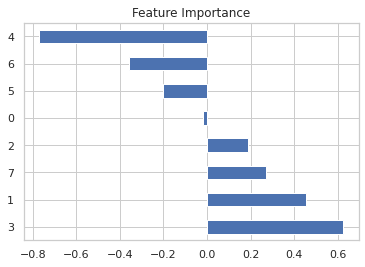

In [ ]:
importance = Logistic_Model.coef_[0]
#importance is a list so you can plot it. 

feat_importances = pd.Series(importance)
feat_importances.nlargest(20).plot(kind='barh',title = 'Feature Importance')

Feature: 0, Score: -0.01672
Feature: 1, Score: 0.45550
Feature: 2, Score: 0.18789
Feature: 3, Score: 0.62519
Feature: 4, Score: -0.77162
Feature: 5, Score: -0.20071
Feature: 6, Score: -0.35872
Feature: 7, Score: 0.27220


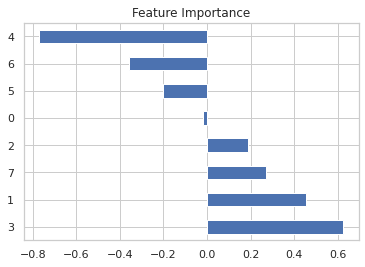

In [ ]:
# get importance
importance =Logistic_Model.coef_[0]
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))

# importance = Logistic_Model.coef_[0]
feature_importance=pd.DataFrame({'feature':list(X_train_LR.columns),'feature_importance':[abs(i) for i in Logistic_Model.coef_[0]]})
feature_importance.sort_values('feature_importance',ascending=False)
importance = Logistic_Model.coef_[0]
#importance is a list so you can plot it. 

feat_importances = pd.Series(importance)
feat_importances.nlargest(20).plot(kind='barh',title = 'Feature Importance')



#Inferences Logistic Regression Model:



1.Independent variables with larger absolute values have a greater impact on target variable.

2.Order of importance of variables -"Hague"(negative influence)>"Blair"(positive influence )>"political.knowledge"(negative influence)>"economic.cond.national"(positive influence)>"Europe"(negative influence).
3.Variable"age","economic .cond.household"and"gender" are least important.
4.Train accuracy and test accuracy & ROC-AUC Scores are very similar ,hence this model doesnot suffer from overfitting.


Classification report for train data in Logistic Regression Model 

In [ ]:
print(classification_report(y_train_LR,y_train_predict))


              precision    recall  f1-score   support

           0       0.75      0.67      0.71       328
           1       0.86      0.90      0.88       733

    accuracy                           0.83      1061
   macro avg       0.81      0.79      0.80      1061
weighted avg       0.83      0.83      0.83      1061



In [ ]:
confusion_matrix(y_train_LR, y_train_predict_LR)

array([[221, 107],
       [ 72, 661]])

Interpretation that 83  % of the vote were given to Labour party ,Recall is 90% ,Precision is 86b% and F1 -score is 88% .These figures looks great and model is a overall a good model .

In [ ]:
Logist_metrics=classification_report(y_train_LR, y_train_predict,output_dict=True)
df=pd.DataFrame(Logist_metrics).transpose()
Logist_train_precision=round(df.loc["1"][0],2)
Logist_train_recall=round(df.loc["1"][1],2)
Logist_train_f1=round(df.loc["1"][2],2)
print ('Logist_train_precision ',Logist_train_precision)
print ('Logist_train_recall ',Logist_train_recall)
print ('Logist_train_f1 ',Logist_train_f1)

Logist_train_precision  0.86
Logist_train_recall  0.9
Logist_train_f1  0.88


Confusion Matrix for test data

In [ ]:
y_train_predict_LR = Logistic_Model.predict(X_train_LR)
y_test_predict_LR = Logistic_Model.predict(X_test_LR)

In [ ]:
confusion_matrix(y_test_LR, y_test_predict_LR)

array([[ 87,  45],
       [ 29, 295]])

TP-A true positive is an outcome where the model correctly predicts the positive class(295) TN- A true Negative is an outcome termed negative that the model has successfully predicted(87) FP-A false postive is an outcome which is predicted yes but in actual it is no(45) FN-A false negative is a n outcome which is predicted No but it is actual Yes(29). This confusion matrix for test data in Logistic Regression Model says that we have 74 as total incorrect predictions and 382 are the total correct predictions .

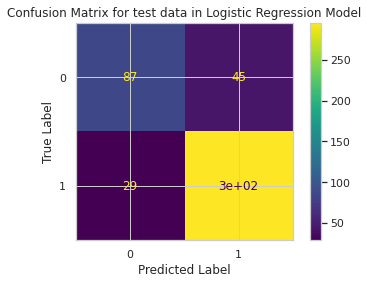

In [ ]:
plot_confusion_matrix(Logistic_Model,X_test_LR, y_test_LR)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for test data in Logistic Regression Model')
# plt.legend(loc="lower right")
# plt.savefig('Log_ROC')
plt.show()

This confusion matrix for test data in Logistic Regression Model says that we have 45+29 as total incorrect prediction and 87+295 as total correct prediction.


Confusion Matrix for test data in Logistic Regression Model 

In [ ]:
print(classification_report(y_test_LR, y_test_predict))

              precision    recall  f1-score   support

           0       0.75      0.66      0.70       132
           1       0.87      0.91      0.89       324

    accuracy                           0.84       456
   macro avg       0.81      0.78      0.80       456
weighted avg       0.83      0.84      0.83       456



Interpretation that 84 % of the vote were given to Labour party ,Recall is 91% ,Precision is 87% and F1 -score is 89% .These figures looks great and model is a overall a good model . 


In [ ]:
Logist_metrics=classification_report(y_test_LR, y_test_predict,output_dict=True)
df=pd.DataFrame(Logist_metrics).transpose()
Logist_test_precision=round(df.loc["1"][0],2)
Logist_test_recall=round(df.loc["1"][1],2)
Logist_test_f1=round(df.loc["1"][2],2)
print ('Logist_test_precision ',Logist_test_precision)
print ('Logist_test_recall ',Logist_test_recall)
print ('Logist_test_f1 ',Logist_test_f1)

Logist_test_precision  0.87
Logist_test_recall  0.91
Logist_test_f1  0.89


#LDA(Linear Discriminant Analysis Model)

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import scale
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix,plot_confusion_matrix

Build LDA Model

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn import metrics
X_train_LDA,X_test_LDA,y_train_LDA,y_test_LDA=train_test_split(X,y,test_size=.30,random_state=1)

In [ ]:
LDA_Model = LinearDiscriminantAnalysis()

Fit the LDA model on train data 

In [ ]:
LDA_Model.fit(X_train_LDA,y_train_LDA)

LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
                           solver='svd', store_covariance=False, tol=0.0001)

In [ ]:
posterior = LDA_Model.decision_function(X_train_LDA)
print(posterior)
print(np.exp(posterior))

[-2.95006026  2.47595104  0.82319121 ...  1.2650685   1.32134149
  3.96041141]
[5.23365519e-02 1.18930125e+01 2.27775706e+00 ... 3.54333545e+00
 3.74844651e+00 5.24789119e+01]


Prediction and Evaluation on both Training and Test Set using Confusion Matrix, Classification Report and AUC-ROC for LDA model

In [ ]:
# Training Data Class Prediction with a cut-off value of 0.5
pred_class_train_LDA= LDA_Model.predict(X_train_LDA)
print(pred_class_train_LDA)


[0 1 1 ... 1 1 1]


In [ ]:
# Test Data Class Prediction with a cut-off value of 0.5
pred_class_test_LDA = LDA_Model.predict(X_test_LDA)

print(pred_class_test_LDA)

[1 1 1 0 1 1 1 1 1 1 1 0 1 0 1 1 1 1 0 1 1 0 0 0 1 1 1 1 1 0 1 0 0 1 0 0 1
 1 0 1 1 1 1 0 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 0 0 1 1 1 0 1 1 1 0 0 0 0 1 1
 1 0 1 1 1 1 1 1 1 1 0 1 1 1 0 1 0 0 1 1 0 1 1 0 1 1 0 0 1 1 1 1 1 1 1 1 1
 1 1 0 0 1 0 1 1 0 1 1 0 0 1 1 1 1 0 1 1 1 1 1 0 1 0 1 0 1 1 0 1 1 1 1 0 0
 1 0 0 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 0 0 1 0 0 0 1 1 1 0 1 0 1 1 0 1 0 1 1
 0 0 1 0 1 1 1 1 1 1 0 1 0 1 1 0 1 1 0 0 0 1 1 1 0 1 1 1 1 1 1 0 1 1 1 0 1
 1 0 1 0 0 1 1 1 1 0 1 0 1 1 0 0 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1
 1 0 0 0 0 1 1 1 1 0 1 0 1 1 1 1 1 1 1 0 0 1 0 1 1 0 1 1 0 1 1 1 0 0 1 0 1
 1 1 1 0 1 0 0 1 0 1 1 1 1 1 1 1 0 0 1 1 1 0 1 1 1 1 1 1 0 1 1 0 1 0 0 1 0
 0 1 1 1 1 0 0 0 0 0 1 1 1 1 1 0 0 1 0 1 1 1 1 1 0 1 0 0 1 1 1 1 1 0 1 1 1
 1 1 0 1 0 1 0 1 1 0 1 1 0 1 1 1 0 0 1 1 0 1 1 1 0 1 1 1 1 1 1 1 0 0 1 0 1
 0 1 1 1 1 1 0 1 1 0 0 1 0 0 1 0 1 1 0 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1 0 1
 0 1 0 1 0 1 1 1 0 1 1 1]


In [ ]:
ytest_predict_prob_LDA=LDA_Model.predict_proba(X_test_LDA)
pd.DataFrame(ytest_predict_prob_LDA).head()

,0,1
0,0.465970,0.534030
1,0.137501,0.862499
2,0.005997,0.994003
3,0.866101,0.133899
4,0.053663,0.946337


In [ ]:
ytrain_predict_prob_LDA=LDA_Model.predict_proba(X_train_LDA)
pd.DataFrame(ytrain_predict_prob_LDA).head()

,0,1
0,0.950266,0.049734
1,0.077561,0.922439
2,0.305087,0.694913
3,0.080344,0.919656
4,0.011710,0.988290


In [ ]:
# Training Data Probability Prediction in LDA MOdel
# ?model.predict_proba

#y_pred = (clf.predict_proba(X_test)[:,1] >= 0.3).astype(bool) # set threshold as 0.3
pred_prob_train_LDA = LDA_Model.predict_proba(X_train_LDA)

# Test Data Probability Prediction in LDA MOdel 
pred_prob_test_LDA = LDA_Model.predict_proba(X_test_LDA)


Plotting confusion matrix for the different models for the Training and test data in Linear Discriminate Analysis Model

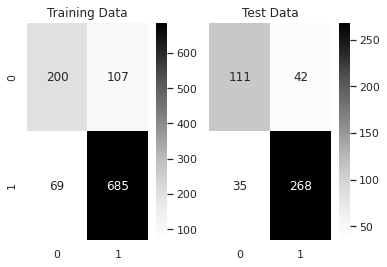

In [ ]:
f,a =  plt.subplots(1,2,sharex=True,sharey=True,squeeze=False)


plot_0 = sns.heatmap((metrics.confusion_matrix(y_train_LDA,pred_class_train_LDA)),annot=True,fmt='.5g',cmap='Greys',ax=a[0][0]);
a[0][0].set_title('Training Data')

plot_1 = sns.heatmap((metrics.confusion_matrix(y_test_LDA,pred_class_test_LDA)),annot=True,fmt='.5g',cmap='Greys',ax=a[0][1]);
a[0][1].set_title('Test Data');

TP-A true positive is an outcome where the model correctly predicts the positive class(660) TN- A true Negative is an outcome termed negative that the model has successfully predicted(223) FP-A false postive is a outcome which is predicted yes but in actual it is no(99) FN-A false negative is a n outcome which is predicted No but it is actual Yes(75) This confusion matrix for train data in Logistic Regression Model says that we have 174 as total incorrect predictions and 883 are the total correct predictions .

TP-A true positive is an outcome where the model correctly predicts the positive class(289) TN- A true Negative is an outcome termed negative that the model has successfully predicted(86) FP-A false postive is a outcome which is predicted yes but in actual it is no(44) FN-A false negative is a n outcome which is predicted No but it is actual Yes(39) This confusion matrix for train data in Logistic Regression Model says that we have 73 as total incorrect predictions and 375 are the total correct predictions .

LDA Model accuracy Score for train Data

In [ ]:
LDA_train_acc=LDA_Model.score(X_train_LDA,y_train_LDA)
LDA_train_acc

0.8341187558906692

LDA Model accuracy score for test data 

In [ ]:
LDA_test_acc=LDA_Model.score(X_test_LDA,y_test_LDA)
LDA_test_acc

0.831140350877193

Evaluation metrics classification report ,confusion matrix for train  and test data in LDA MOdel 

In [ ]:
LDA_metrics=classification_report(y_train_LDA,pred_class_train_LDA,output_dict=True)
df=pd.DataFrame(LDA_metrics).transpose()
LDA_train_precision=round(df.loc["1"][0],2)
LDA_train_recall=round(df.loc["1"][1],2)
LDA_train_f1=round(df.loc["1"][2],2)
print ('LDA_train_precision ',LDA_train_precision)
print ('LDA_train_recall ',LDA_train_recall)
print ('LDA_train_f1 ',LDA_train_f1)

LDA_train_precision  0.86
LDA_train_recall  0.91
LDA_train_f1  0.89


In [ ]:
LDA_metrics=classification_report(y_test_LDA,pred_class_test_LDA,output_dict=True)
df=pd.DataFrame(LDA_metrics).transpose()
LDA_test_precision=round(df.loc["1"][0],2)
LDA_test_recall=round(df.loc["1"][1],2)
LDA_test_f1=round(df.loc["1"][2],2)
print ('LDA_test_precision ',LDA_test_precision)
print ('LDA_test_recall ',LDA_test_recall)
print ('LDA_test_f1 ',LDA_test_f1)

LDA_test_precision  0.86
LDA_test_recall  0.88
LDA_test_f1  0.87


The results after applying LDA on train and test sets are as follows:


Classification Report of training and Test data in LDA Model

In [ ]:
print('Classification Report of the training data-LDA Model:\n\n',metrics.classification_report(y_train_LDA,pred_class_train_LDA),'\n')
print('Classification Report of the test data-LDA Model:\n\n',metrics.classification_report(y_test_LDA,pred_class_test_LDA),'\n')

Classification Report of the training data-LDA Model:

               precision    recall  f1-score   support

           0       0.74      0.65      0.69       307
           1       0.86      0.91      0.89       754

    accuracy                           0.83      1061
   macro avg       0.80      0.78      0.79      1061
weighted avg       0.83      0.83      0.83      1061
 

Classification Report of the test data-LDA Model:

               precision    recall  f1-score   support

           0       0.76      0.73      0.74       153
           1       0.86      0.88      0.87       303

    accuracy                           0.83       456
   macro avg       0.81      0.80      0.81       456
weighted avg       0.83      0.83      0.83       456
 



In [ ]:
# Training Data Probability Prediction in LDA Model
# ?model.predict_proba

#y_pred = (clf.predict_proba(X_test)[:,1] >= 0.3).astype(bool) # set threshold as 0.3
pred_prob_train_LDA = LDA_Model.predict_proba(X_train_LDA)

# Test Data Probability Prediction in LDA Model
pred_prob_test_LDA = LDA_Model.predict_proba(X_test_LDA)

No handles with labels found to put in legend.


AUC: 0.888


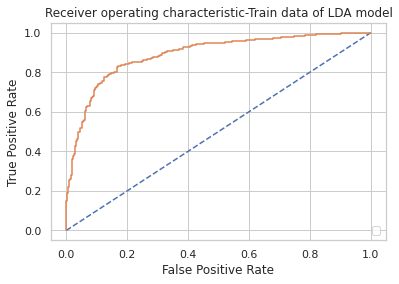

No handles with labels found to put in legend.


AUC: 0.890


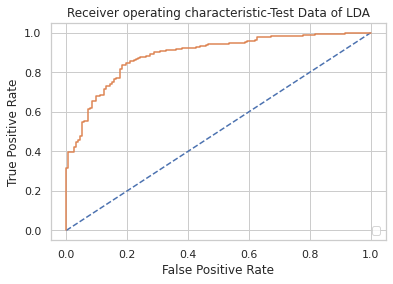

In [ ]:
# AUC and ROC for the training data in LDA MOdel
# predict probabilities
probs = LDA_Model.predict_proba(X_train_LDA)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
LDA_train_auc = roc_auc_score(y_train_LDA, probs)
print('AUC: %.3f' % Logist_train_auc)
# calculate roc curve
LDA_train_fpr, LDA_train_tpr, LDA_train_thresholds = roc_curve(y_train_LDA, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(LDA_train_fpr, LDA_train_tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic-Train data of LDA model')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()
# AUC and ROC for the test data in LDA Model

# predict probabilities
probs = LDA_Model.predict_proba(X_test_LDA)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
LDA_test_auc = roc_auc_score(y_test_LDA, probs)
print('AUC: %.3f' % LDA_train_auc)
# calculate roc curve
LDA_test_fpr, LDA_test_tpr, LDA_test_thresholds = roc_curve(y_test_LDA, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(LDA_test_fpr, LDA_test_tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic-Test Data of LDA')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

ROC_AUC -Scores
Train set:88% || Test set:89%

In the LDA model as well ,we can look at the feature coefficient values and deduce how much each feature influences the result/decision .


Plotting the coefficient values in a Bar plot for better understanding.

In [ ]:
X_train_LDA.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1061 entries, 991 to 1065
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      1061 non-null   int64  
 1   economic.cond.national   1061 non-null   float64
 2   economic.cond.household  1061 non-null   float64
 3   Blair                    1061 non-null   int64  
 4   Hague                    1061 non-null   int64  
 5   Europe                   1061 non-null   int64  
 6   political.knowledge      1061 non-null   float64
 7   gender                   1061 non-null   int8   
dtypes: float64(3), int64(4), int8(1)
memory usage: 67.3 KB


Feature: 0, Score: -0.02018
Feature: 1, Score: 0.63314
Feature: 2, Score: 0.06685
Feature: 3, Score: 0.74136
Feature: 4, Score: -0.92726
Feature: 5, Score: -0.22367
Feature: 6, Score: -0.42879
Feature: 7, Score: 0.14765


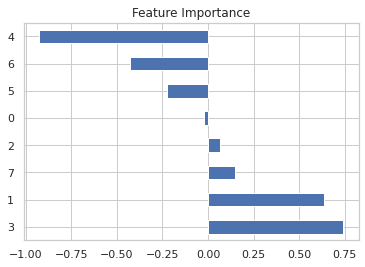

In [ ]:
# get importance
importance =LDA_Model.coef_[0]
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))

# importance = Logistic_Model.coef_[0]
feature_importance=pd.DataFrame({'feature':list(X_train_LDA.columns),'feature_importance':[abs(i) for i in LDA_Model.coef_[0]]})
feature_importance.sort_values('feature_importance',ascending=False)
importance = LDA_Model.coef_[0]
#importance is a list so you can plot it. 

feat_importances = pd.Series(importance)
feat_importances.nlargest(20).plot(kind='barh',title = 'Feature Importance')

#Inferences-LDA Model:


1.Order of importance of predictors-"Hague">"Blair">"political.knowledge">"economic.cond.national">"Europe".
2.Predictors "age","gender" and "economic.cond.household" are least important .
3.Train accuracy and test accuracy & ROC-AUC scores are very similar ,hence thi smodel doenot suffers from overfitting .


# 2.Apply KNN Model,Naive Model and Support Vector machine (SVM) Model

KNN Model
For naive bayes algorithm while calculating likelihoods of numerical features it assumes the feature to be normally distributed and then we calculate probability using mean and variance of that feature only and also it assumes that all the predictors are independent to each other. Scale doesn’t matter. Performing a features scaling in this algorithms may not have much effect.

Generally, good KNN performance usually requires preprocessing of data to make all variables similarly scaled and centered

Now lets apply zscore on continues columns and see the performance for KNN

In [ ]:
# Import the libraries:
# To enable plotting graphs in Jupyter notebook
%matplotlib inline 
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from scipy.stats import zscore
import seaborn as sns
import matplotlib.pyplot as plt



Generally, good KNN performance usually requires preprocessing of data to make all variables similarly scaled and centered

Now lets apply zscore on continues columns and see the performance for KNN.


In [ ]:
# Scaling for KNN Model
# convert the features into z scores as we do not know what units / scales were used and store them in new dataframe
# It is always adviced to scale numeric attributes in models that calculate distances

In [ ]:
XScaled  = X.apply(zscore)  # convert all attributes to Z scale 

XScaled.describe()

,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
count,1.517000e+03,1.517000e+03,1.517000e+03,1.517000e+03,1.517000e+03,1.517000e+03,1.517000e+03,1.517000e+03
mean,1.917458e-17,-5.848980e-16,-2.304609e-16,-1.034842e-16,5.386448e-17,6.293947e-17,-7.665442e-16,2.648581e-16
std,1.000330e+00,1.000330e+00,1.000330e+00,1.000330e+00,1.000330e+00,1.000330e+00,1.000330e+00,1.000330e+00
min,-1.926617e+00,-2.059394e+00,-1.872709e+00,-1.988727e+00,-1.419969e+00,-1.740556e+00,-1.421084e+00,-9.367365e-01
25%,-8.435773e-01,-3.016479e-01,-1.796818e-01,-1.137217e+00,-6.083289e-01,-8.309016e-01,-1.421084e+00,-9.367365e-01
50%,-7.907881e-02,-3.016479e-01,-1.796818e-01,5.658022e-01,-6.083289e-01,-2.244654e-01,4.238322e-01,-9.367365e-01
75%,8.128361e-01,8.701828e-01,9.490028e-01,5.658022e-01,1.014951e+00,9.884072e-01,4.238322e-01,1.067536e+00
max,2.469250e+00,2.042014e+00,2.077687e+00,1.417312e+00,1.826592e+00,1.291625e+00,1.346290e+00,1.067536e+00


In [ ]:
XScaled.head()
# all column adjusted to zero mean and standard deviation to 1.

,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
0,-0.716161,-0.301648,-0.179682,0.565802,-1.419969,-1.437338,0.423832,-0.936736
1,-1.162118,0.870183,0.949003,0.565802,1.014951,-0.527684,0.423832,1.067536
2,-1.225827,0.870183,0.949003,1.417312,-0.608329,-1.134120,0.423832,1.067536
3,-1.926617,0.870183,-1.308366,-1.137217,-1.419969,-0.830902,-1.421084,-0.936736
4,-0.843577,-1.473479,-1.308366,-1.988727,-1.419969,-0.224465,0.423832,1.067536


In [ ]:
# Split X and y into training and test set in 70:30 ratio

X_train_KNN, X_test_KNN, y_train_KNN, y_test_KNN = train_test_split(XScaled, y, test_size=0.30, random_state=0)

Build KNN Model(Without Tuning Hyperparameter)



Build the model. Print the Accuracy of the model with different values of k=5,7,15,17

Hint: For accuracy use model.score()


In [ ]:
KNN_model=KNeighborsClassifier(n_neighbors= 5,weights='uniform',algorithm='auto',n_jobs=None )

In [ ]:
# Call Nearest Neighbour algorithm and fit the model

KNN_model.fit(X_train_KNN, y_train_KNN)


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [ ]:
# KNeighborsClassifier?

Evaluate Performance of kNN Model

In [ ]:
# For every test data point, predict it's label based on 5 nearest neighbours in this model. The majority class will 
# be assigned to the test data point
# 93.3 % of outr prediction turns out to be true .
predicted_labels = KNN_model.predict(X_test_KNN)
KNN_model.score(X_test_KNN, y_test_KNN)

0.8223684210526315

In [ ]:
## Performance Matrix on train data set
y_train_predict_KNN = KNN_model.predict(X_train_KNN)
KNN_model_score_train = KNN_model.score(X_train_KNN, y_train_KNN)
print(KNN_model_score_train)
print(metrics.confusion_matrix(y_train_KNN, y_train_predict_KNN))
print(metrics.classification_report(y_train_KNN, y_train_predict_KNN))

0.8708765315739868
[[252  76]
 [ 61 672]]
              precision    recall  f1-score   support

           0       0.81      0.77      0.79       328
           1       0.90      0.92      0.91       733

    accuracy                           0.87      1061
   macro avg       0.85      0.84      0.85      1061
weighted avg       0.87      0.87      0.87      1061



In [ ]:
## Performance Matrix on test data set
## Performance Matrix on train data set
y_test_predict_KNN = KNN_model.predict(X_test_KNN)
KNN_model_score_test = KNN_model.score(X_test_KNN, y_test_KNN)
print(KNN_model_score_test)
print(metrics.confusion_matrix(y_test_KNN, y_test_predict_KNN))
print(metrics.classification_report(y_test_KNN, y_test_predict_KNN))

0.8223684210526315
[[ 91  41]
 [ 40 284]]
              precision    recall  f1-score   support

           0       0.69      0.69      0.69       132
           1       0.87      0.88      0.88       324

    accuracy                           0.82       456
   macro avg       0.78      0.78      0.78       456
weighted avg       0.82      0.82      0.82       456



No handles with labels found to put in legend.


AUC: 0.935


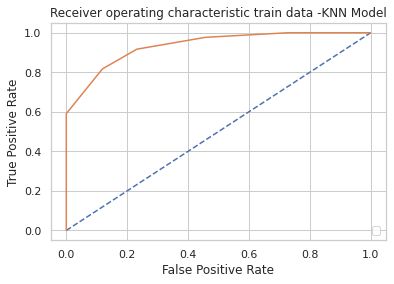

In [ ]:
probs = KNN_model.predict_proba(X_train_KNN)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
KNN_train_auc = roc_auc_score(y_train_KNN, probs)
print('AUC: %.3f' % KNN_train_auc)
# calculate roc curve
KNN_train_fpr, KNN_train_tpr, KNN_trainthresholds = roc_curve(y_train_KNN, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(KNN_train_fpr, KNN_train_tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic train data -KNN Model')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()


No handles with labels found to put in legend.


AUC: 0.845


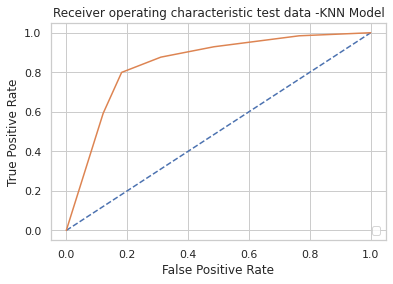

In [ ]:
# predict probabilities
probs = KNN_model.predict_proba(X_test_KNN)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
KNN_test_auc = roc_auc_score(y_test_KNN, probs)
print('AUC: %.3f' % KNN_test_auc)
# calculate roc curve
KNN_test_fpr, KNN_test_tpr, KNN_testthresholds = roc_curve(y_test_KNN, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(KNN_test_fpr, KNN_test_tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic test data -KNN Model')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()


RIC-AUC Scores:
Train Set:93% |Test set:85%

In [ ]:
KNN_metrics=classification_report(y_train_KNN,y_train_predict_KNN,output_dict=True)
df=pd.DataFrame(KNN_metrics).transpose()
KNN_train_precision=round(df.loc["1"][0],2)
KNN_train_recall=round(df.loc["1"][1],2)
KNN_train_f1=round(df.loc["1"][2],2)
print ('KNN_train_precision ',KNN_train_precision)
print ('KNN_train_recall ',KNN_train_recall)
print ('KNN_train_f1 ',KNN_train_f1)

KNN_train_precision  0.9
KNN_train_recall  0.92
KNN_train_f1  0.91


In [ ]:
KNN_metrics=classification_report(y_test_KNN,y_test_predict_KNN,output_dict=True)
df=pd.DataFrame(KNN_metrics).transpose()
KNN_test_precision=round(df.loc["1"][0],2)
KNN_test_recall=round(df.loc["1"][1],2)
KNN_test_f1=round(df.loc["1"][2],2)
print ('KNN_test_precision ',KNN_test_precision)
print ('KNN_test_recall ',KNN_test_recall)
print ('KNN_test_f1 ',KNN_test_f1)

KNN_test_precision  0.87
KNN_test_recall  0.88
KNN_test_f1  0.88


Run the KNN with no of neighbours to be 1,3,5..19 and *Find the optimal number of neighbours from K=1,3,5,7....19 using the Mis classification error

Hint: Misclassification error (MCE) = 1 - Test accuracy score. Calculated MCE for each model with neighbours = 1,3,5...19 and find the model with lowest MCE

In [ ]:
# empty list that will hold accuracy scores
ac_scores = []

# perform accuracy metrics for values from 1,3,5....19
for k in range(1,20,2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_KNN, y_train_KNN)
    # evaluate test accuracy
    scores = knn.score(X_test_KNN, y_test_KNN)
    ac_scores.append(scores)

# changing to misclassification error
MCE = [1 - x for x in ac_scores]
MCE


[0.22587719298245612,
 0.19517543859649122,
 0.17763157894736847,
 0.17763157894736847,
 0.1842105263157895,
 0.17543859649122806,
 0.17982456140350878,
 0.17982456140350878,
 0.16885964912280704,
 0.1578947368421053]

Plot misclassification error vs k (with k value on X-axis) using matplotlib

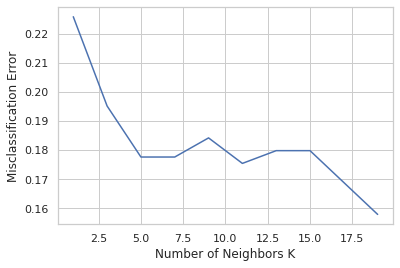

In [ ]:
import matplotlib.pyplot as plt
# plot misclassification error vs k
plt.plot(range(1,20,2), MCE)
plt.xlabel('Number of Neighbors K')
plt.ylabel('Misclassification Error')
plt.show()

For K =5 it is giving the best test accuracy lets check train and test both with other evaluation metrics

In [ ]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(KNN_model, X_train_KNN, y_train_KNN, cv=10)
scores

array([0.73831776, 0.85849057, 0.82075472, 0.73584906, 0.78301887,
       0.87735849, 0.79245283, 0.76415094, 0.81132075, 0.81132075])

In [ ]:
scores = cross_val_score(KNN_model, X_test_KNN, y_test_KNN, cv=10)
scores

array([0.7826087 , 0.84782609, 0.82608696, 0.7173913 , 0.82608696,
       0.82608696, 0.82222222, 0.88888889, 0.84444444, 0.88888889])

In [ ]:
## After 10 fold cross validation, scores both on train and test data set respectively for all 10 folds are almost same. 
## Hence our model is valid.
## Students are advised to perform CV on other models and compare the results.

KNN Model(After HyperParameter Tuning)

In [ ]:
param_grid = {'n_neighbors':[5,6,7,8,9,10],'weights':['uniform','distance'],'algorithm':['auto','ball_tree','brute','kd_tree'],'p':[2]}
KNN_model = KNeighborsClassifier()
                              
KNN_model.fit(X_train_KNN,y_train_KNN)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [ ]:
grid_search = GridSearchCV(estimator = KNN_model, param_grid = param_grid)

In [ ]:
grid_search.fit(X_train_KNN,y_train_KNN)

GridSearchCV(cv=None, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid={'algorithm': ['auto', 'ball_tree', 'brute', 'kd_tree'],
                         'n_neighbors': [5, 6, 7, 8, 9, 10], 'p': [2],
                         'weights': ['uniform', 'distance']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [ ]:
grid_search.best_params_

{'algorithm': 'auto', 'n_neighbors': 9, 'p': 2, 'weights': 'uniform'}

In [ ]:
best_grid = grid_search.best_estimator_

In [ ]:
best_grid

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=9, p=2,
                     weights='uniform')

In [ ]:
# Predicting the Training and Testing data
ytrain_predict = best_grid.predict(X_train_KNN)
ytest_predict = best_grid.predict(X_test_KNN)

In [ ]:
# KNN Model Performance Evaluation on Training data
confusion_matrix(y_train_KNN,ytrain_predict)

array([[236,  92],
       [ 70, 663]])

In [ ]:
KNNg_train_acc=best_grid.score(X_train_KNN,y_train_KNN) 
KNNg_train_acc

0.8473138548539114

In [ ]:
print(classification_report(y_train_KNN,ytrain_predict))

              precision    recall  f1-score   support

           0       0.77      0.72      0.74       328
           1       0.88      0.90      0.89       733

    accuracy                           0.85      1061
   macro avg       0.82      0.81      0.82      1061
weighted avg       0.85      0.85      0.85      1061



Area under Curve is 0.9207421056134163


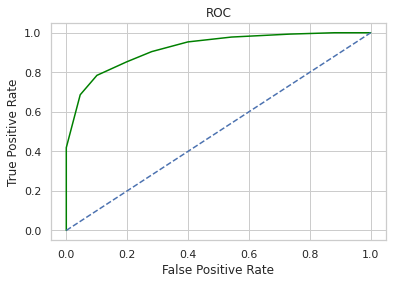

In [ ]:
KNNg_train_fpr, KNNg_train_tpr,_=roc_curve(y_train_KNN,best_grid.predict_proba(X_train_KNN)[:,1])
plt.plot(KNNg_train_fpr,KNNg_train_tpr,color='green')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
KNNg_train_auc=roc_auc_score(y_train_KNN,best_grid.predict_proba(X_train_KNN)[:,1])
print('Area under Curve is', KNNg_train_auc)

In [ ]:
# KNN Model Performance Evaluation on Test data

In [ ]:
confusion_matrix(y_test_KNN,ytest_predict)

array([[ 89,  43],
       [ 41, 283]])

In [ ]:
KNNg_test_acc=best_grid.score(X_test_KNN,y_test_KNN)
KNNg_test_acc

0.8157894736842105

In [ ]:
print(classification_report(y_test_KNN,ytest_predict))

              precision    recall  f1-score   support

           0       0.68      0.67      0.68       132
           1       0.87      0.87      0.87       324

    accuracy                           0.82       456
   macro avg       0.78      0.77      0.78       456
weighted avg       0.81      0.82      0.82       456



Area under Curve is 0.9207421056134163


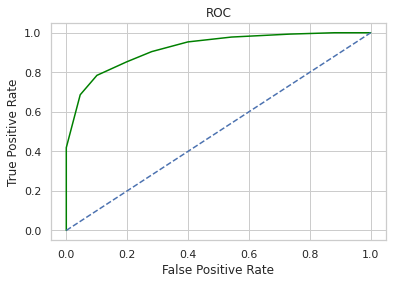

In [ ]:
KNNg_train_fpr, KNNg_train_tpr,_=roc_curve(y_train_KNN,best_grid.predict_proba(X_train_KNN)[:,1])
plt.plot(KNNg_train_fpr,KNNg_train_tpr,color='green')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
KNNg_train_auc=roc_auc_score(y_train_KNN,best_grid.predict_proba(X_train_KNN)[:,1])
print('Area under Curve is', KNNg_train_auc)

ROC-AUC scores:
Train set :92% |Test set:92%

Inferences KNN(After Tuning Hyperprameter)

1.A significant difference in ROC and AUC scores of train and test set implies the untuned KNN Model suffers from overfitting.
2.Hyperparameter tuning of select parameters giving similar accuracy and  ROC-AUC scores of train and test set making the model more generalised.
3.The optimum number of neighbors come out to be 9 and the weight parameter "uniform"  and p=2 gives better results.

##Gaussian Naive Bayes Model


In [ ]:
XScaled  = X.apply(zscore)  # convert all attributes to Z scale 

XScaled.describe()

,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
count,1.517000e+03,1.517000e+03,1.517000e+03,1.517000e+03,1.517000e+03,1.517000e+03,1.517000e+03,1.517000e+03
mean,1.917458e-17,-5.848980e-16,-2.304609e-16,-1.034842e-16,5.386448e-17,6.293947e-17,-7.665442e-16,2.648581e-16
std,1.000330e+00,1.000330e+00,1.000330e+00,1.000330e+00,1.000330e+00,1.000330e+00,1.000330e+00,1.000330e+00
min,-1.926617e+00,-2.059394e+00,-1.872709e+00,-1.988727e+00,-1.419969e+00,-1.740556e+00,-1.421084e+00,-9.367365e-01
25%,-8.435773e-01,-3.016479e-01,-1.796818e-01,-1.137217e+00,-6.083289e-01,-8.309016e-01,-1.421084e+00,-9.367365e-01
50%,-7.907881e-02,-3.016479e-01,-1.796818e-01,5.658022e-01,-6.083289e-01,-2.244654e-01,4.238322e-01,-9.367365e-01
75%,8.128361e-01,8.701828e-01,9.490028e-01,5.658022e-01,1.014951e+00,9.884072e-01,4.238322e-01,1.067536e+00
max,2.469250e+00,2.042014e+00,2.077687e+00,1.417312e+00,1.826592e+00,1.291625e+00,1.346290e+00,1.067536e+00


In [ ]:
# Split X and y into training and test set in 70:30 ratio
# Split X and y into training and test set in 70:30 ratio
from sklearn.model_selection import train_test_split
X_train_NB, X_test_NB, y_train_NB, y_test_NB = train_test_split(XScaled, y, test_size=0.30, random_state=0)

In [ ]:
# GuassianNB classifier is built .After building the guassianNB classifier ,our model is ready to make predictions.

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics

In [ ]:
NB_model = GaussianNB()

In [ ]:
# The GuassianNB classifier is trained using training data .To train the guassianNB classifier we will use fit() method.

In [ ]:
# Fit the model

In [ ]:

NB_model.fit(X_train_NB,y_train_NB)

GaussianNB(priors=None, var_smoothing=1e-09)

Now GaussianNB classifier is built. The classifier is trained using training data. We can use fit() method for training it. After building a classifier, our model is ready to make predictions. We can use predict() method with test set features as its parameters.

Performance Matrix on train data set

In [ ]:
y_train_predict_NB = NB_model.predict(X_train_NB)
model_score_NB_Train = NB_model.score(X_train_NB, y_train_NB)                      ## Accuracy
print(model_score_NB_Train)
print(metrics.confusion_matrix(y_train_NB, y_train_predict_NB))          ## confusion_matrix
print(metrics.classification_report(y_train_NB, y_train_predict_NB))     ## classification_report

0.824693685202639
[[230  98]
 [ 88 645]]
              precision    recall  f1-score   support

           0       0.72      0.70      0.71       328
           1       0.87      0.88      0.87       733

    accuracy                           0.82      1061
   macro avg       0.80      0.79      0.79      1061
weighted avg       0.82      0.82      0.82      1061



No handles with labels found to put in legend.


AUC: 0.884


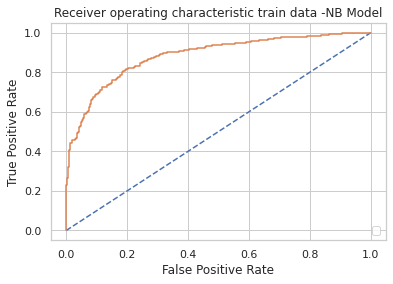

In [ ]:
probs = NB_model.predict_proba(X_train_NB)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
NB_train_auc = roc_auc_score(y_train_NB, probs)
print('AUC: %.3f' % NB_train_auc)
# calculate roc curve
NB_train_fpr, NB_train_tpr, NB_trainthresholds = roc_curve(y_train_NB, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(NB_train_fpr, NB_train_tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic train data -NB Model')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()


In [ ]:
## Performance Matrix on test data set
y_test_predict_NB = NB_model.predict(X_test_NB)
model_score_NB_Test = NB_model.score(X_test_NB, y_test_NB)                      ## Accuracy
print(model_score_NB_Test)
print(metrics.confusion_matrix(y_test_NB, y_test_predict_NB))          ## confusion_matrix
print(metrics.classification_report(y_test_NB, y_test_predict_NB))     ## classification_report


0.8442982456140351
[[ 95  37]
 [ 34 290]]
              precision    recall  f1-score   support

           0       0.74      0.72      0.73       132
           1       0.89      0.90      0.89       324

    accuracy                           0.84       456
   macro avg       0.81      0.81      0.81       456
weighted avg       0.84      0.84      0.84       456



In [ ]:
NB_metrics=classification_report(y_train_NB,y_train_predict_NB,output_dict=True)
df=pd.DataFrame(NB_metrics).transpose()
NB_train_precision=round(df.loc["1"][2],2)
NB_train_recall=round(df.loc["1"][1],2)
NB_train_f1=round(df.loc["1"][2],2)
print ('NB_train_precision',NB_train_precision)
print ('NB_train_recall',NB_train_recall)
print ('NB_train_f1',NB_train_f1)

NB_train_precision 0.87
NB_train_recall 0.88
NB_train_f1 0.87


In [ ]:
NB_metrics=classification_report(y_test_NB,y_test_predict_NB,output_dict=True)
df=pd.DataFrame(NB_metrics).transpose()
NB_test_precision=round(df.loc["1"][0],2)
NB_test_recall=round(df.loc["1"][1],2)
NB_test_f1=round(df.loc["1"][2],2)
print ('NB_test_precision ',NB_test_precision)
print ('NB_test_recall ',NB_test_recall)
print ('NB_test_f1 ',NB_test_f1)

NB_test_precision  0.89
NB_test_recall  0.9
NB_test_f1  0.89


No handles with labels found to put in legend.


AUC: 0.888


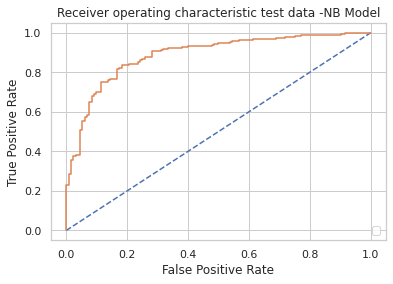

In [ ]:
probs = NB_model.predict_proba(X_test_NB)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
NB_test_auc = roc_auc_score(y_test_NB, probs)
print('AUC: %.3f' % NB_test_auc)
# calculate roc curve
NB_test_fpr, NB_test_tpr, NB_testthresholds = roc_curve(y_test_NB, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(NB_test_fpr, NB_test_tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic test data -NB Model')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()


In [ ]:
print('Classification Report of the training data in NB_model:\n\n',metrics.classification_report(y_train_NB,y_train_predict_NB),'\n')
print('Classification Report of the test data in NB_model:\n\n',metrics.classification_report(y_test_NB,y_test_predict_NB),'\n')

Classification Report of the training data in NB_model:

               precision    recall  f1-score   support

           0       0.72      0.70      0.71       328
           1       0.87      0.88      0.87       733

    accuracy                           0.82      1061
   macro avg       0.80      0.79      0.79      1061
weighted avg       0.82      0.82      0.82      1061
 

Classification Report of the test data in NB_model:

               precision    recall  f1-score   support

           0       0.74      0.72      0.73       132
           1       0.89      0.90      0.89       324

    accuracy                           0.84       456
   macro avg       0.81      0.81      0.81       456
weighted avg       0.84      0.84      0.84       456
 



Accuracy of our Gaussian Naive Bayes model

In [ ]:
NB_model.score(X_train_NB, y_train_NB)

0.824693685202639

In [ ]:
NB_model.score(X_test_NB, y_test_NB)

0.8442982456140351

ROC-AUC Scores:
Train Set :88% |Test set: 88%



Inferences:
The Naives model is fairly generalised (have similar accuracy and ROC-AUC scores for train and test set.

##SVM Model(Support Vector Machine)-Untuned 

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm

In [ ]:
# Split X and y into training and test set in 70:30 ratio

X_train_SVM, X_test_SVM, y_train_SVM, y_test_SVM = train_test_split(XScaled, y, test_size=0.30, random_state=0)

In [ ]:
#Import svm model
from sklearn.svm import SVC

In [ ]:
#Create a svm Classifier
clf = svm.SVC(kernel='linear',probability=True) # Linear Kernel

In [ ]:
#Train the model using the training sets

clf.fit(X_train_SVM,y_train_SVM)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=True, random_state=None, shrinking=True, tol=0.001,
    verbose=False)

In [ ]:
#Predict the response for train dataset
y_pred_Train = clf.predict(X_train_SVM)

In [ ]:
#Predict the response for test dataset
y_pred_Test = clf.predict(X_test_SVM)

Evaluating the Model
Let's estimate how accurately the classifier or model can predict the votes.
Accuracy can be computed by comparing actual test set values and predicted values.

In [ ]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

# Model Accuracy: how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_train_SVM, y_pred_Train))

Accuracy: 0.8312912346842601


In [ ]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

# Model Accuracy: how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test_SVM, y_pred_Test))

Accuracy: 0.8399122807017544


Well, we got a classification rate of 83 %, considered as very good accuracy.

For further evaluation, you can also check precision and recall of model.

In [ ]:
# Model Precision: what percentage of positive tuples are labeled as such?
print("Precision:",metrics.precision_score(y_train_SVM, y_pred_Train))

# Model Recall: what percentage of positive tuples are labelled as such?
print("Recall:",metrics.recall_score(y_train_SVM, y_pred_Train))

Precision: 0.8588082901554405
Recall: 0.9045020463847203


In [ ]:
# Model Precision: what percentage of positive tuples are labeled as such?
print("Precision:",metrics.precision_score(y_test_SVM, y_pred_Test))

# Model Recall: what percentage of positive tuples are labelled as such?
print("Recall:",metrics.recall_score(y_test_SVM, y_pred_Test))

Precision: 0.8746268656716418
Recall: 0.904320987654321


Well, we got a precision of 87% and recall of 90%, which are considered as very good values.

In [ ]:
## Performance Matrix on test data set
ytrain_predict = clf.predict(X_train_SVM)
model_score_SVM_Train = clf.score(X_train_SVM, y_train_SVM)                      ## Accuracy
print(model_score_SVM_Train)
print(metrics.confusion_matrix(y_train_SVM, y_train_predict))          ## confusion_matrix
print(metrics.classification_report(y_train_SVM, y_train_predict))     ## classification_report


0.8312912346842601
[[221 107]
 [ 72 661]]
              precision    recall  f1-score   support

           0       0.75      0.67      0.71       328
           1       0.86      0.90      0.88       733

    accuracy                           0.83      1061
   macro avg       0.81      0.79      0.80      1061
weighted avg       0.83      0.83      0.83      1061



In [ ]:
## Performance Matrix on test data set
ytest_predict = clf.predict(X_test_SVM)
model_score_SVM_Test = clf.score(X_test_SVM, y_test_SVM)                      ## Accuracy
print(model_score_SVM_Test)
print(metrics.confusion_matrix(y_test_SVM, y_test_predict))          ## confusion_matrix
print(metrics.classification_report(y_test_SVM, y_test_predict))     ## classification_report


0.8399122807017544
[[ 87  45]
 [ 29 295]]
              precision    recall  f1-score   support

           0       0.75      0.66      0.70       132
           1       0.87      0.91      0.89       324

    accuracy                           0.84       456
   macro avg       0.81      0.78      0.80       456
weighted avg       0.83      0.84      0.83       456



ROC_AUC Scores for Train set

No handles with labels found to put in legend.


AUC: 0.886


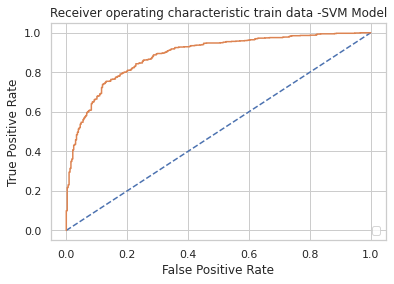

In [ ]:
probs = clf.predict_proba(X_train_SVM)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
SVM_train_auc = roc_auc_score(y_train_SVM, probs)
print('AUC: %.3f' % SVM_train_auc)
# calculate roc curve
SVM_train_fpr, SVM_train_tpr, SVM_trainthresholds = roc_curve(y_train_SVM, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(SVM_train_fpr, SVM_train_tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic train data -SVM Model')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()


No handles with labels found to put in legend.


AUC: 0.890


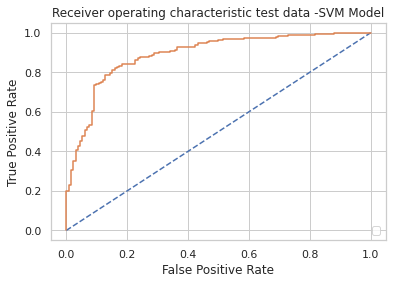

In [ ]:
probs = clf.predict_proba(X_test_SVM)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
SVM_test_auc = roc_auc_score(y_test_SVM, probs)
print('AUC: %.3f' % SVM_test_auc)
# calculate roc curve
SVM_test_fpr, SVM_test_tpr, SVM_testthresholds = roc_curve(y_test_SVM, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(SVM_test_fpr, SVM_test_tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic test data -SVM Model')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()


ROC-AUC Scores:
Train set:88.6% | Test set:89%

When we use linear kernel in SVM we can get the feature coefficients values.
Lets visualise them using a graph.

In [ ]:
X_train_SVM.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1061 entries, 1373 to 686
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      1061 non-null   float64
 1   economic.cond.national   1061 non-null   float64
 2   economic.cond.household  1061 non-null   float64
 3   Blair                    1061 non-null   float64
 4   Hague                    1061 non-null   float64
 5   Europe                   1061 non-null   float64
 6   political.knowledge      1061 non-null   float64
 7   gender                   1061 non-null   float64
dtypes: float64(8)
memory usage: 74.6 KB


#Feature Importance Bar plot for SVM(Untunned Model)

Feature: 0, Score: -0.26050
Feature: 1, Score: 0.25644
Feature: 2, Score: 0.08142
Feature: 3, Score: 0.48118
Feature: 4, Score: -0.70111
Feature: 5, Score: -0.59991
Feature: 6, Score: -0.36234
Feature: 7, Score: 0.06809


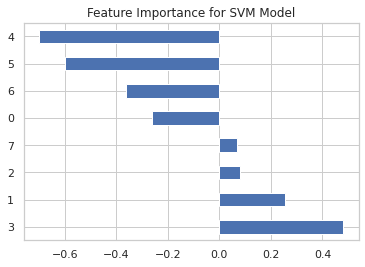

In [ ]:
# get importance
importance =clf.coef_[0]
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))

feature_importance=pd.DataFrame({'feature':list(X_train_SVM.columns),'feature_importance':[abs(i) for i in clf.coef_[0]]})
feature_importance.sort_values('feature_importance',ascending=False)
importance = clf.coef_[0]
#importance is a list so you can plot it. 

feat_importances = pd.Series(importance)
feat_importances.nlargest(20).plot(kind='barh',title = 'Feature Importance for SVM Model')

SVM Model (After Hyperparameter Tuning)

In [ ]:
from sklearn.svm import SVC 
from sklearn.model_selection import GridSearchCV

In [ ]:
#Import svm model
from sklearn.svm import SVC

In [ ]:
# Split X and y into training and test set in 70:30 ratio

X_train_SVM, X_test_SVM, y_train_SVM, y_test_SVM = train_test_split(XScaled, y, test_size=0.30, random_state=0)

In [ ]:
param_grid = {'kernel':['linear','rbf','poly'],'C':[10.0,1, 0.1],'gamma':[0.2,0.3,0.4,0.5,0.6],'degree':[2,3]}



In [ ]:
svc = SVC(probability=True)

In [ ]:
svc.fit(X_train_SVM,y_train_SVM)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=True, random_state=None, shrinking=True, tol=0.001,
    verbose=False)

In [ ]:
grid_search = GridSearchCV(estimator = svc, param_grid = param_grid)

In [ ]:
svc.get_params().keys()

dict_keys(['C', 'break_ties', 'cache_size', 'class_weight', 'coef0', 'decision_function_shape', 'degree', 'gamma', 'kernel', 'max_iter', 'probability', 'random_state', 'shrinking', 'tol', 'verbose'])

In [ ]:
grid_search.fit(X_train_SVM,y_train_SVM)

GridSearchCV(cv=None, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=True, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [10.0, 1, 0.1], 'degree': [2, 3],
                         'gamma': [0.2, 0.3, 0.4, 0.5, 0.6],
                         'kernel': ['linear', 'rbf', 'poly']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [ ]:
grid_search.best_params_

{'C': 0.1, 'degree': 2, 'gamma': 0.2, 'kernel': 'linear'}

In [ ]:
best_grid = grid_search.best_estimator_

In [ ]:
best_grid

SVC(C=0.1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=2, gamma=0.2, kernel='linear',
    max_iter=-1, probability=True, random_state=None, shrinking=True, tol=0.001,
    verbose=False)

In [ ]:
# Predicting the Training and Testing data
ytrain_predict = best_grid.predict(X_train_SVM)
ytest_predict = best_grid.predict(X_test_SVM)

In [ ]:
# SVM Tuned Model Performance Evaluation on Training data
confusion_matrix(y_train_SVM,ytrain_predict)

array([[222, 106],
       [ 71, 662]])

In [ ]:

SVMGRID_train_acc=best_grid.score(X_train_SVM,y_train_SVM) 
SVMGRID_train_acc

0.8331762488218661

In [ ]:
print(classification_report(y_train_SVM,ytrain_predict))

              precision    recall  f1-score   support

           0       0.76      0.68      0.71       328
           1       0.86      0.90      0.88       733

    accuracy                           0.83      1061
   macro avg       0.81      0.79      0.80      1061
weighted avg       0.83      0.83      0.83      1061



Area under Curve is 0.8869913153428941


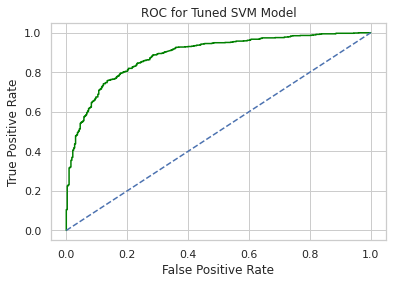

In [ ]:
SVMGRID_train_fpr, SVMGRID_train_tpr,_=roc_curve(y_train_SVM,best_grid.predict_proba(X_train_SVM)[:,1])
plt.plot(SVMGRID_train_fpr,SVMGRID_train_tpr,color='green')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC for Tuned SVM Model')
SVMGRID_train_auc=roc_auc_score(y_train_SVM,best_grid.predict_proba(X_train_SVM)[:,1])
print('Area under Curve is', SVMGRID_train_auc)

Area under Curve is 0.8900346053123831


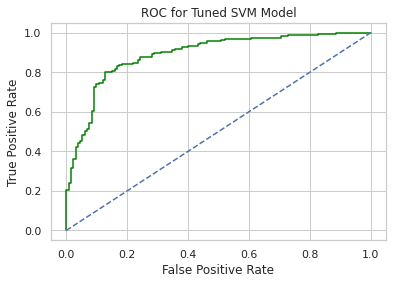

In [ ]:
SVMGRID_test_fpr, SVMGRID_test_tpr,_=roc_curve(y_test_SVM,best_grid.predict_proba(X_test_SVM)[:,1])
plt.plot(SVMGRID_test_fpr,SVMGRID_test_tpr,color='green')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC for Tuned SVM Model')
SVMGRID_test_auc=roc_auc_score(y_test_SVM,best_grid.predict_proba(X_test_SVM)[:,1])
print('Area under Curve is', SVMGRID_test_auc)

# SVM Tuned Model Performance Evaluation on Test data

In [ ]:
confusion_matrix(y_test_SVM,ytest_predict)

array([[ 90,  42],
       [ 31, 293]])

In [ ]:
SVMGRID_test_acc=best_grid.score(X_test_SVM,y_test_SVM)
SVMGRID_test_acc

0.8399122807017544

In [ ]:
print(classification_report(y_test_SVM,ytest_predict))

              precision    recall  f1-score   support

           0       0.74      0.68      0.71       132
           1       0.87      0.90      0.89       324

    accuracy                           0.84       456
   macro avg       0.81      0.79      0.80       456
weighted avg       0.84      0.84      0.84       456



ROC-AUC scores: Train set :% |Test set:%

Inferences:
1.Unlike previously trained models "age" is a good predictor in SVM model with linear kernel.
2.Gender and economic cond household are the two ;east important predictors.
3.Untuned SVM model with linear kernel and tuned SVM model do not suffer from overfitting.
4.A slight increase in recall is observed after Hyperparameter tuning.

In [ ]:
# Comparison of the performance metrics from the 2 models(gaussian NB and KNN_Model)

In [ ]:
models=[KNN_model,NB_model]
# models_names={modelLR:'Logistic Regression model',modelLDA:'Linear Discriminate model'}
models_names={KNN_model:'KNN model',NB_model:'NB model'}
for i in range(0,len(models)):
    if models[i]==KNN_model:
        print('Accuracy Score for Train set for {} is {}'.format(models_names[models[i]],round(accuracy_score(y_train_KNN,models[i].predict(X_train_KNN)),2)))
        print('Accuracy Score for Test set for {} is {}'.format(models_names[models[i]],round(accuracy_score(y_test_KNN,models[i].predict(X_test_KNN)),2)) )
    else:
        print('Accuracy Score for Train set for {} is {}'.format(models_names[models[i]],round(accuracy_score(y_train_NB,models[i].predict(X_train_NB)),2)))
        print('Accuracy Score for Test set for {} is {}'.format(models_names[models[i]],round(accuracy_score(y_test_NB,models[i].predict(X_test_NB)),2)) )

Accuracy Score for Train set for KNN model is 0.87
Accuracy Score for Test set for KNN model is 0.82
Accuracy Score for Train set for NB model is 0.82
Accuracy Score for Test set for NB model is 0.84


In [ ]:

models=[KNN_model,NB_model]
# models_names={modelLR:'Logistic Regression model',modelLDA:'Linear Discriminate model'}
models_names={KNN_model:'K nearest Neighbour model',NB_model:'Naives Bayes model'}
for i in range(0,len(models)):
    if models[i]==KNN_model:
        print('Accuracy Score for Train set for{}is {}'.format(models_names[models[i]],round(accuracy_score(y_train_KNN,models[i].predict(X_train_KNN)),2)))
        print('Accuracy Score for Test set for{}is {}'.format(models_names[models[i]],round(accuracy_score(y_test_KNN,models[i].predict(X_test_KNN)),2)) )
    else:
        print('Accuracy Score for Train set for{}is {}'.format(models_names[models[i]],round(accuracy_score(y_train_NB,models[i].predict(X_train_NB)),2)))
        print('Accuracy Score for Test set for{}is {}'.format(models_names[models[i]],round(accuracy_score(y_test_NB,models[i].predict(X_test_NB)),2)) )

Accuracy Score for Train set forK nearest Neighbour modelis 0.87
Accuracy Score for Test set forK nearest Neighbour modelis 0.82
Accuracy Score for Train set forNaives Bayes modelis 0.82
Accuracy Score for Test set forNaives Bayes modelis 0.84


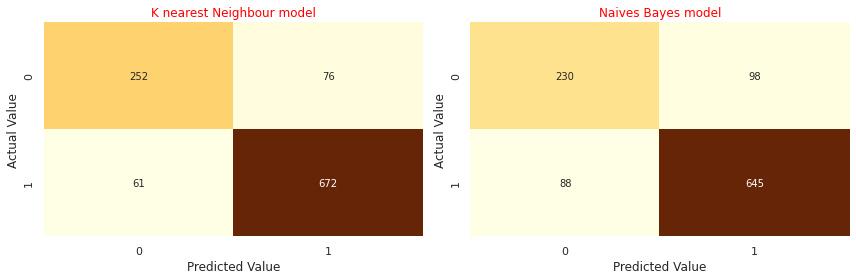

In [ ]:
# Comparing the confusion matrices from GaussiansNB model and KNN models for train set 
models=[KNN_model,NB_model]
# models_names={modelLR:'Logistic Regression model',modelLDA:'Linear Discriminate model'}
models_names={KNN_model:'K nearest Neighbour model',NB_model:'Naives Bayes model'}
fig=plt.figure(figsize=(12,4))
for i in range(0,len(models)):
    ax=fig.add_subplot(1,2,i+1)
    if models[i]==KNN_model:
        sns.heatmap(confusion_matrix(y_train_KNN,models[i].predict(X_train_KNN)),annot=True,fmt='.0f',cbar=False,cmap='YlOrBr')
        ax.set_title(models_names[models[i]],color='Red')
        plt.ylabel('Actual Value')
        plt.xlabel('Predicted Value')
    else:
        sns.heatmap(confusion_matrix(y_train_NB,models[i].predict(X_train_NB)),annot=True,fmt='.0f',cbar=False,cmap='YlOrBr')
        ax.set_title(models_names[models[i]],color='Red')
        plt.ylabel('Actual Value')
        plt.xlabel('Predicted Value')
        
plt.tight_layout()

#    plot_confusion_matrix(modelLR,X_train,y_train)     

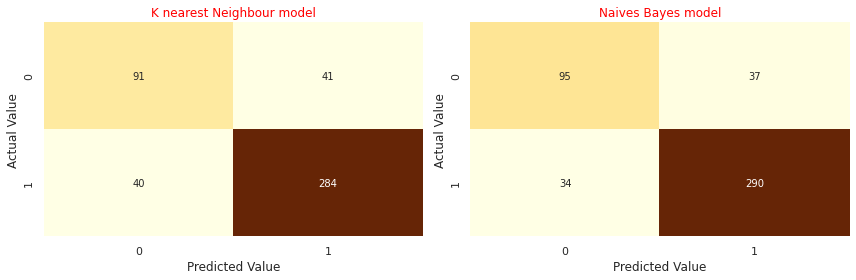

In [ ]:
# Comparing the confusion matrices from gaussiansNB and KNN models for test set: 
models=[KNN_model,NB_model]
# models_names={modelLR:'Logistic Regression model',modelLDA:'Linear Discriminate model'}
models_names={KNN_model:'K nearest Neighbour model',NB_model:'Naives Bayes model'}
fig=plt.figure(figsize=(12,4))
for i in range(0,len(models)):
    ax=fig.add_subplot(1,2,i+1)
    if models[i]==KNN_model:
        sns.heatmap(confusion_matrix(y_test_KNN,models[i].predict(X_test_KNN)),annot=True,fmt='.0f',cbar=False,cmap='YlOrBr')
        ax.set_title(models_names[models[i]],color='Red')
        plt.ylabel('Actual Value')
        plt.xlabel('Predicted Value')
    else:
        sns.heatmap(confusion_matrix(y_test_NB,models[i].predict(X_test_NB)),annot=True,fmt='.0f',cbar=False,cmap='YlOrBr')
        ax.set_title(models_names[models[i]],color='Red')
        plt.ylabel('Actual Value')
        plt.xlabel('Predicted Value')
        
plt.tight_layout()

#    plot_confusion_matrix(modelLR,X_train,y_train)  

Area under the curve for KNN model is 0.935
Area under the curve for NB model is 0.884


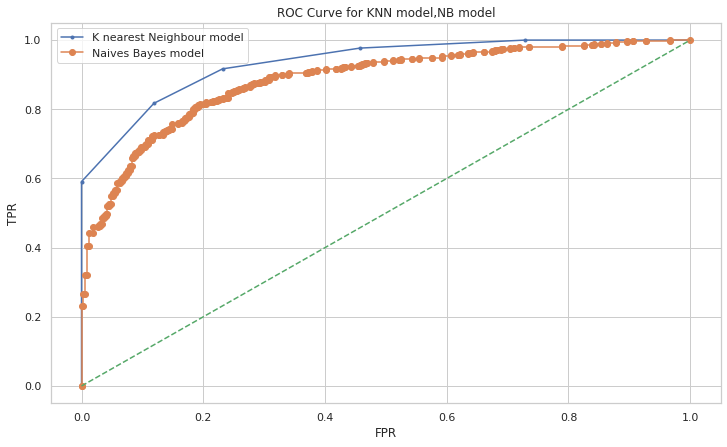

In [ ]:

# Comparing area under curve for GaussiansNB and KNN models for train set:
models=[KNN_model,NB_model]
# models_names={modelLR:'Logistic Regression model',modelLDA:'Linear Discriminate model'}
models_names={KNN_model:'K nearest Neighbour model',NB_model:'Naives Bayes model'}
print('Area under the curve for KNN model is',
      round(roc_auc_score(y_train_KNN,KNN_model.predict_proba(X_train_KNN)[:,1]),3))
print('Area under the curve for NB model is',
      round(roc_auc_score(y_train_NB,NB_model.predict_proba(X_train_NB)[:,1]),3))


plt.figure(figsize=(12,7))
fpr_dtc,tpr_dtc,thresholds=roc_curve(y_train_KNN,KNN_model.predict_proba(X_train_KNN)[:,1])
plt.plot(fpr_dtc,tpr_dtc,marker='.')
fpr_rfc,tpr_rfc,thresholds=roc_curve(y_train_NB,NB_model.predict_proba(X_train_NB)[:,1])
plt.plot(fpr_rfc,tpr_rfc,marker='o')
plt.plot([0,1],[0,1],linestyle='--')
plt.title('ROC Curve for {}'.format('KNN model,NB model'))
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.legend(models_names.values())
plt.show()

Area under the curve for KNN model is 0.845
Area under the curve for NB model is 0.888


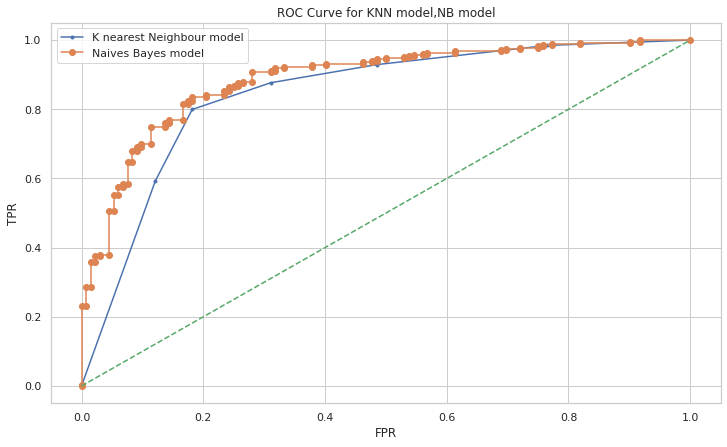

In [ ]:
# Comparing area under curve for Gaussians and KNN models for test set:
models=[KNN_model,NB_model]
# models_names={modelLR:'Logistic Regression model',modelLDA:'Linear Discriminate model'}
models_names={KNN_model:'K nearest Neighbour model',NB_model:'Naives Bayes model'}
print('Area under the curve for KNN model is',
      round(roc_auc_score(y_test_KNN,KNN_model.predict_proba(X_test_KNN)[:,1]),3))
print('Area under the curve for NB model is',
      round(roc_auc_score(y_test_NB,NB_model.predict_proba(X_test_NB)[:,1]),3))


plt.figure(figsize=(12,7))
fpr_dtc,tpr_dtc,thresholds=roc_curve(y_test_KNN,KNN_model.predict_proba(X_test_KNN)[:,1])
plt.plot(fpr_dtc,tpr_dtc,marker='.')
fpr_rfc,tpr_rfc,thresholds=roc_curve(y_test_NB,NB_model.predict_proba(X_test_NB)[:,1])
plt.plot(fpr_rfc,tpr_rfc,marker='o')
plt.plot([0,1],[0,1],linestyle='--')
plt.title('ROC Curve for {}'.format('KNN model,NB model'))
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.legend(models_names.values())
plt.show()

In [ ]:
 # Tabular comparasion of Accuracy ,AUC,Recall,Precesion,and F1-Score of guassians NB & KNN model (Test & Train data):

index=['Accuracy','AUC', 'Recall','Precision','F1 Score']
data = pd.DataFrame({'KNN train':[KNN_model_score_train,KNN_train_auc,KNN_train_recall,KNN_train_precision,KNN_train_f1],
        'KNN Test':[KNN_model_score_test,KNN_test_auc,KNN_test_recall,KNN_test_precision,KNN_test_f1],
       'NB Train':[model_score_NB_Train,NB_train_auc,NB_train_recall,NB_train_precision,NB_train_f1],
        'NB Test':[model_score_NB_Test,NB_test_auc,NB_test_recall,NB_test_precision,NB_test_f1]},index=index)
round(data,2)


,KNN train,KNN Test,NB Train,NB Test
Accuracy,0.87,0.82,0.82,0.84
AUC,0.93,0.84,0.88,0.89
Recall,0.92,0.88,0.88,0.90
Precision,0.90,0.87,0.87,0.89
F1 Score,0.91,0.88,0.87,0.89


# Model Tuning 
Model Tuning
What is Model Tuning?

Tuning is usually a trial-and-error process by which you change some hyperparameters (for example, the number of trees in a tree-based algorithm or the value of alpha in a linear algorithm), run the algorithm on the data again, then compare its performance on your validation set in order to determine which set of hyperparameters results in the most accurate model.

All machine learning algorithms have a “default” set of hyperparameters, which Machine Learning Mastery defines as “a configuration that is external to the model and whose value cannot be estimated from data.” Different algorithms consist of different hyperparameters. For example, regularized regression models have coefficients penalties, decision trees have a set number of branches, and neural networks have a set number of layers. When building models, analysts and data scientists choose the default configuration of these hyperparameters after running the model on several datasets.

While the generic set of hyperparameters for each algorithm provides a starting point for analysis and will generally result in a well-performing model, it may not have the optimal configurations for your particular dataset and business problem. In order to find the best hyperparameters for your data, you need to tune them.
Why is Model Tuning Important?

Model tuning allows you to customize your models so they generate the most accurate outcomes and give you highly valuable insights into your data, enabling you to make the most effective business decisions.

##Random Forest Model

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
X_train_RF,X_test_RF,y_train_RF,y_test_RF=train_test_split(X,y,test_size=.30,random_state=0)

In [ ]:
RF_model=RandomForestClassifier(n_estimators=100,random_state=1)
RF_model.fit(X_train_RF,y_train_RF)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=1, verbose=0,
                       warm_start=False)

In [ ]:
## Performance Matrix on test data set
y_train_predict_RF= RF_model.predict(X_train_RF)
RF_model_score= RF_model.score(X_train_RF,y_train_RF)
print(RF_model_score)
print(metrics.confusion_matrix(y_train_RF, y_train_predict_RF))
print(metrics.classification_report(y_train_RF, y_train_predict_RF))

1.0
[[328   0]
 [  0 733]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       328
           1       1.00      1.00      1.00       733

    accuracy                           1.00      1061
   macro avg       1.00      1.00      1.00      1061
weighted avg       1.00      1.00      1.00      1061



In [ ]:
## Performance Matrix on test data set
y_test_predict_RF= RF_model.predict(X_test_RF)
RF_model_score= RF_model.score(X_test_RF,y_test_RF)
print(RF_model_score)
print(metrics.confusion_matrix(y_test_RF, y_test_predict_RF))
print(metrics.classification_report(y_test_RF, y_test_predict_RF))

0.831140350877193
[[ 91  41]
 [ 36 288]]
              precision    recall  f1-score   support

           0       0.72      0.69      0.70       132
           1       0.88      0.89      0.88       324

    accuracy                           0.83       456
   macro avg       0.80      0.79      0.79       456
weighted avg       0.83      0.83      0.83       456



Grid Search for finding out the optimal values for the hyper parameters.Due to large volume of data, trying for different parameter values in the gridsearch with higher cv value will have higher execution time, so the best values that came after the search are directly put in Param_grid.

In [ ]:
param_grid = {'max_depth': [5,6,7],
    'max_features': [8,9,10],
    'min_samples_leaf': [20,25,30],
    'min_samples_split': [50,60,70],
    'n_estimators': [50,100,150]
}
    

rfcl = RandomForestClassifier(random_state=1)
# Applying Grid Search
# grid_search_rf = GridSearchCV(estimator = model_rf, param_grid = grid_rf,n_jobs=-1, cv = 3,scoring='f1')
grid_search_RF=GridSearchCV(estimator = rfcl, param_grid = param_grid,cv = 5)

In [ ]:
grid_search_RF.fit(X_train_RF,y_train_RF)

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False, random_state=1,
                                   

In [ ]:
grid_search_RF.best_params_

{'max_depth': 5,
 'max_features': 8,
 'min_samples_leaf': 20,
 'min_samples_split': 60,
 'n_estimators': 100}

In [ ]:
best_grid_RF = grid_search_RF.best_estimator_

In [ ]:
best_grid_RF

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=5, max_features=8,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=20, min_samples_split=60,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=1, verbose=0,
                       warm_start=False)

In [ ]:

model_RF=RandomForestClassifier(max_depth=5, max_features=8, min_samples_leaf=20,
                       min_samples_split=50, n_estimators=200)

In [ ]:
ytrain_predict_RF = best_grid_RF.predict(X_train_RF)
ytest_predict_RF = best_grid_RF.predict(X_test_RF)

In [ ]:
# RF Model Performance Evaluation on Training data
confusion_matrix(y_train_RF,ytrain_predict_RF)

array([[240,  88],
       [ 84, 649]])

In [ ]:
# RF Model Performance Evaluation on Test data
confusion_matrix(y_test_RF,ytest_predict_RF)

array([[ 96,  36],
       [ 32, 292]])

In [ ]:
RF_train_acc=best_grid_RF.score(X_train_RF,y_train_RF) 
RF_train_acc

0.8378887841658812

In [ ]:
RF_test_acc=best_grid_RF.score(X_test_RF,y_test_RF) 
RF_test_acc

0.8508771929824561

In [ ]:
print(classification_report(y_train_RF,ytrain_predict_RF))

              precision    recall  f1-score   support

           0       0.74      0.73      0.74       328
           1       0.88      0.89      0.88       733

    accuracy                           0.84      1061
   macro avg       0.81      0.81      0.81      1061
weighted avg       0.84      0.84      0.84      1061



In [ ]:
print(classification_report(y_test_RF,ytest_predict_RF))

              precision    recall  f1-score   support

           0       0.75      0.73      0.74       132
           1       0.89      0.90      0.90       324

    accuracy                           0.85       456
   macro avg       0.82      0.81      0.82       456
weighted avg       0.85      0.85      0.85       456



In [ ]:
RF_metrics=classification_report(y_train_RF,ytrain_predict_RF,output_dict=True)
df=pd.DataFrame(RF_metrics).transpose()
train_RF_precision=round(df.loc["1"][0],2)
train_RF_recall=round(df.loc["1"][1],2)
train_RF_f1=round(df.loc["1"][2],2)
print ('train_RF_precision ',train_RF_precision)
print ('train_RF_recall ',train_RF_recall)
print ('train_RF_f1 ',train_RF_f1)

train_RF_precision  0.88
train_RF_recall  0.89
train_RF_f1  0.88


In [ ]:
RF_metrics=classification_report(y_test_RF,ytest_predict_RF,output_dict=True)
df=pd.DataFrame(RF_metrics).transpose()
test_RF_precision=round(df.loc["1"][0],2)
test_RF_recall=round(df.loc["1"][1],2)
test_RF_f1=round(df.loc["1"][2],2)
print ('test_RF_precision ',test_RF_precision)
print ('test_RF_recall ',test_RF_recall)
print ('test_RF_f1 ',test_RF_f1)

test_RF_precision  0.89
test_RF_recall  0.9
test_RF_f1  0.9


Area under Curve is 0.9066877682760457


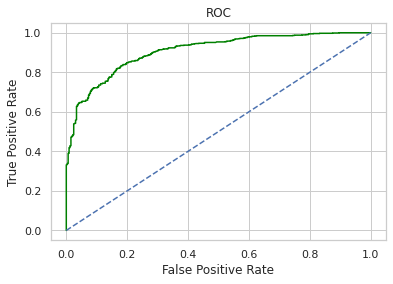

In [ ]:
train_RF_fpr, train_RF_tpr,_=roc_curve(y_train_RF,best_grid_RF.predict_proba(X_train_RF)[:,1])
plt.plot(train_RF_fpr,train_RF_tpr,color='green')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
train_RF_auc=roc_auc_score(y_train_RF,best_grid_RF.predict_proba(X_train_RF)[:,1])
print('Area under Curve is', train_RF_auc)

Area under Curve is 0.8872170781893004


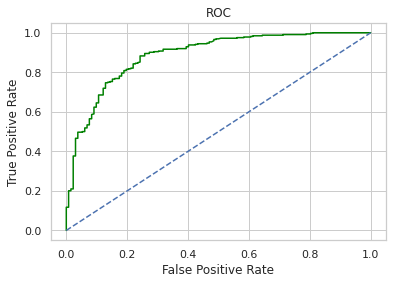

In [ ]:
test_RF_fpr, test_RF_tpr,_=roc_curve(y_test_RF,best_grid_RF.predict_proba(X_test_RF)[:,1])
plt.plot(test_RF_fpr,test_RF_tpr,color='green')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
test_RF_auc=roc_auc_score(y_test_RF,best_grid_RF.predict_proba(X_test_RF)[:,1])
print('Area under Curve is', test_RF_auc)

In [ ]:
# Variable Importance
print (pd.DataFrame(best_grid_RF.feature_importances_, columns = ["Imp"], index = X_train_RF.columns).sort_values('Imp',ascending=False))

                              Imp
Hague                    0.400414
Blair                    0.238268
Europe                   0.184487
political.knowledge      0.083455
age                      0.056366
economic.cond.national   0.025779
economic.cond.household  0.009352
gender                   0.001878


As per the model tuning on random forest model we come to see that Hague variable is the most important variable followed by the Blair ,Europe and political .knowledge.

##Random Forest (After Hyperparameter Tuning)

The details of the range of Hyperparameters,and the best values are documented in Appendix.

Instantiate the Random Forest Classifier Class

In [ ]:
X_train_rfcl,X_test_rfcl,y_train_rfcl,y_test_rfcl=train_test_split(X,y,test_size=.30,random_state=0)

In [ ]:
rfcl = RandomForestClassifier(n_estimators = 501, random_state=100)
rfcl = rfcl.fit(X_train_rfcl,y_train_rfcl)

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid={'max_depth':[5,6,7,8,9,10],'min_samples_split':[8,9,10],'n_estimators':[100,200,300],'criterion':["gini","entropy"],'random_state':[100]}


rfcl = RandomForestClassifier()

grid_search = GridSearchCV(estimator = rfcl, param_grid = param_grid, cv = 3)

In [ ]:
grid_search.fit(X_train_rfcl,y_train_rfcl)

GridSearchCV(cv=3, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              rando

Get best parameters

In [ ]:
grid_search.best_params_

{'criterion': 'gini',
 'max_depth': 8,
 'min_samples_split': 10,
 'n_estimators': 200,
 'random_state': 100}

In [ ]:
best_grid = grid_search.best_estimator_

Predict on both train and test sets

In [ ]:
ytrain_predict = best_grid.predict(X_train_rfcl)
ytest_predict = best_grid.predict(X_test_rfcl)

Check Feature Importances

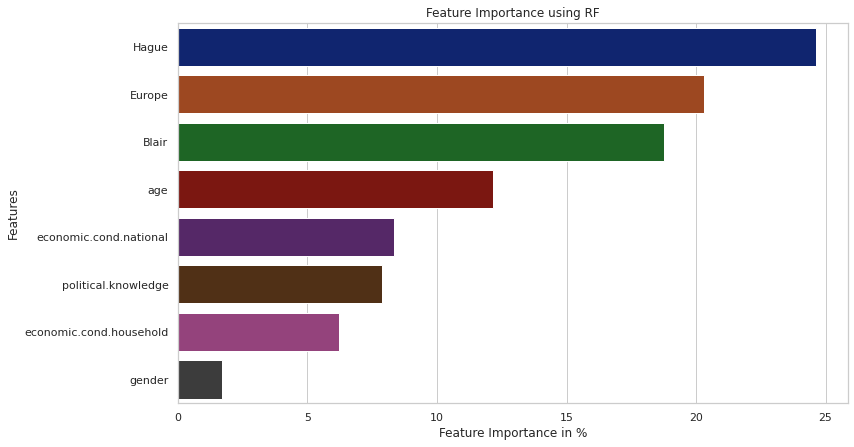

In [ ]:
x=pd.DataFrame(best_grid.feature_importances_*100,index=X_train_rfcl.columns).sort_values(by=0,ascending=False)
plt.figure(figsize=(12,7))
sns.barplot(x[0],x.index,palette='dark')
plt.xlabel('Feature Importance in %')
plt.ylabel('Features')
plt.title('Feature Importance using RF')
plt.show()

Using Scikit-learn metrics, print confusion matrix and classification report

In [ ]:
from sklearn.metrics import confusion_matrix,classification_report

In [ ]:
confusion_matrix(y_train_rfcl,ytrain_predict)

array([[259,  69],
       [ 34, 699]])

In [ ]:
confusion_matrix(y_test_rfcl,ytest_predict)

array([[ 88,  44],
       [ 30, 294]])

In [ ]:
print(classification_report(y_train_rfcl,ytrain_predict))

              precision    recall  f1-score   support

           0       0.88      0.79      0.83       328
           1       0.91      0.95      0.93       733

    accuracy                           0.90      1061
   macro avg       0.90      0.87      0.88      1061
weighted avg       0.90      0.90      0.90      1061



In [ ]:
print(classification_report(y_test_rfcl,ytest_predict))

              precision    recall  f1-score   support

           0       0.75      0.67      0.70       132
           1       0.87      0.91      0.89       324

    accuracy                           0.84       456
   macro avg       0.81      0.79      0.80       456
weighted avg       0.83      0.84      0.83       456



Plot ROC Curve and print area under the curve

import matplotlib.pyplot as plt

AUC: 0.963


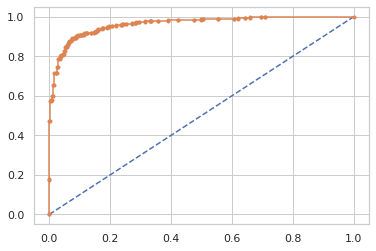

In [ ]:
# AUC and ROC for the training data

# predict probabilities
probs = best_grid.predict_proba(X_train_rfcl)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(y_train_rfcl, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_train_rfcl, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

AUC: 0.895


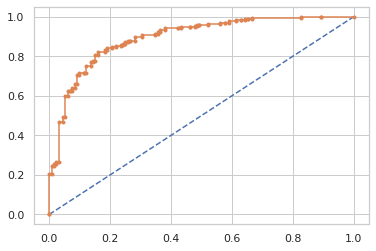

In [ ]:
# AUC and ROC for the test data

# predict probabilities
probs = best_grid.predict_proba(X_test_rfcl)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(y_test_rfcl, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test_rfcl, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

ROC-AUC Scores:

Train set: 96%| Test set:89%

In Random Forest models,we can took a look at the feature importance values.
Plotting it on a Bar chart for better undersatanding.


Inferences :
1.Un-tunned Random Forest models usually suffers from overfitting ,just like we observed.
2.After performing Hyperparameter Tuning ,a more generalised model was obtained .We wee able to reduce the difference in Accuracy scores for train and test sets.
3.'Age' turn out to be a fairly good feature in tuned Random Forest Model.
4.'Gender' and 'economic condition household' are the least important features.
 

## Bagging Ensemble method

#Bagging Classifier (Without Hyperparameter Tuning)

In [ ]:
 from sklearn.ensemble import BaggingClassifier

In [ ]:
X_train_bag,X_test_bag,y_train_bag,y_test_bag=train_test_split(X,y,test_size=.30,random_state=0)

In [ ]:
# base_estimator=RF_model, n_estimators=50,random_state=1

In [ ]:
from sklearn.ensemble import BaggingClassifier

bgcl = BaggingClassifier()

bgcl = bgcl.fit(X_train_bag, y_train_bag)


0.9896324222431668


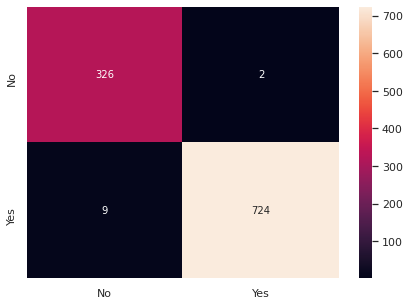

In [ ]:
y_predict_train = bgcl.predict(X_train_bag)

print(bgcl.score(X_train_bag , y_train_bag))

cm=metrics.confusion_matrix(y_train_bag, y_predict_train,labels=[0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in ["No","Yes"]],
                  columns = [i for i in ["No","Yes"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g')

0.7982456140350878


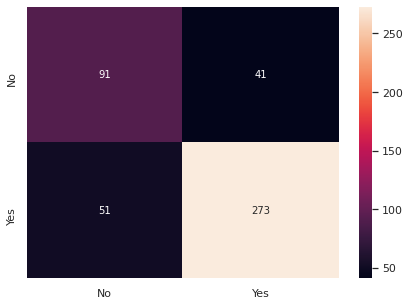

In [ ]:
y_predict_test = bgcl.predict(X_test_bag)

print(bgcl.score(X_test_bag , y_test_bag))

cm=metrics.confusion_matrix(y_test_bag, y_predict_test,labels=[0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in ["No","Yes"]],
                  columns = [i for i in ["No","Yes"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g')

# Following are the results obtained after using an untuned -bagging classifier.

In [ ]:
print(classification_report(y_train_bag,y_predict_train))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98       328
           1       1.00      0.99      0.99       733

    accuracy                           0.99      1061
   macro avg       0.99      0.99      0.99      1061
weighted avg       0.99      0.99      0.99      1061



In [ ]:
print(classification_report(y_test_bag,y_predict_test))

              precision    recall  f1-score   support

           0       0.64      0.69      0.66       132
           1       0.87      0.84      0.86       324

    accuracy                           0.80       456
   macro avg       0.76      0.77      0.76       456
weighted avg       0.80      0.80      0.80       456



Area under Curve Bagging Classifier is 0.9995528732572455


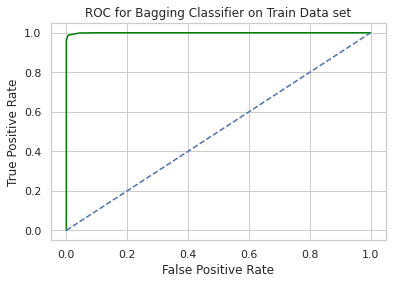

In [ ]:
train_bag_fpr, train_bag_tpr,_=roc_curve(y_train_bag,bgcl.predict_proba(X_train_bag)[:,1])
plt.plot(train_bag_fpr,train_bag_tpr,color='green')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC for Bagging Classifier on Train Data set')
train_bag_auc=roc_auc_score(y_train_bag,bgcl.predict_proba(X_train_bag)[:,1])
print('Area under Curve Bagging Classifier is', train_bag_auc)

Area under Curve -Bagging Classifier is 0.849595491956603


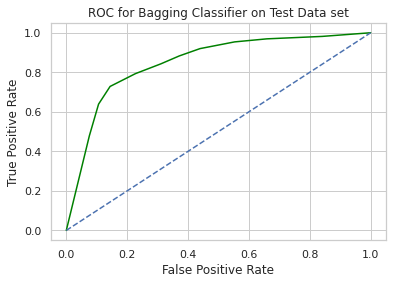

In [ ]:
test_bag_fpr, test_bag_tpr,_=roc_curve(y_test_bag,bgcl.predict_proba(X_test_bag)[:,1])
plt.plot(test_bag_fpr,test_bag_tpr,color='green')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC for Bagging Classifier on Test Data set')
test_bag_auc=roc_auc_score(y_test_RF,bgcl.predict_proba(X_test_bag)[:,1])
print('Area under Curve -Bagging Classifier is', test_bag_auc)

AUC-ROC scores :
Train set: 99% & Test set: 88.9%

#Bagging Classifier (After Hyperparameter Tuning)

In [ ]:
from sklearn.svm import SVC 
from sklearn.model_selection import GridSearchCV

In [ ]:
#Import svm model
from sklearn.svm import SVC


In [ ]:
# Split X and y into training and test set in 70:30 ratio

X_train_bag, X_test_bag, y_train_bag, y_test_bag = train_test_split(XScaled, y, test_size=0.30, random_state=0)


In [ ]:
svc = SVC(probability=True)
param_grid = {'kernel':['linear','rbf','poly'],'C':[10.0,1, 0.1],'gamma':[0.2,0.3,0.4,0.5,0.6],'degree':[2,3]}
svc = SVC(probability=True)




In [ ]:
svc = SVC(probability=True)
param_grid = {'kernel':['rbf'],'C':[10.0,1, 0.1],'gamma':[0.2,0.3,0.4,0.5,0.6],'degree':[2,3]}
svc = SVC(probability=True)

In [ ]:
svc.get_params()

{'C': 1.0,
 'break_ties': False,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 'scale',
 'kernel': 'rbf',
 'max_iter': -1,
 'probability': True,
 'random_state': None,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

In [ ]:
grid_search.fit(X_train_bag,y_train_bag)

GridSearchCV(cv=3, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              rando

In [ ]:
grid_search.best_params_

{'criterion': 'gini',
 'max_depth': 10,
 'min_samples_split': 10,
 'n_estimators': 100,
 'random_state': 100}

In [ ]:
best_grid_bag= grid_search.best_estimator_


In [ ]:
best_grid_bag

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=10, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=100,
                       verbose=0, warm_start=False)

In [ ]:
# Predicting the Training and Testing data
ytrain_predict = best_grid_bag.predict(X_train_bag)
ytest_predict = best_grid_bag.predict(X_test_bag)


In [ ]:
# SVM Tuned Model Performance Evaluation on Training data
confusion_matrix(y_train_bag,ytrain_predict)
SVMGRID_train_acc=best_grid_bag.score(X_train_bag,y_train_bag) 
SVMGRID_train_acc


0.9114043355325165

In [ ]:
print(classification_report(y_train_bag,ytrain_predict))



              precision    recall  f1-score   support

           0       0.88      0.82      0.85       328
           1       0.92      0.95      0.94       733

    accuracy                           0.91      1061
   macro avg       0.90      0.89      0.89      1061
weighted avg       0.91      0.91      0.91      1061



In [ ]:
print(classification_report(y_test_bag,ytest_predict))

              precision    recall  f1-score   support

           0       0.75      0.67      0.71       132
           1       0.87      0.91      0.89       324

    accuracy                           0.84       456
   macro avg       0.81      0.79      0.80       456
weighted avg       0.84      0.84      0.84       456



Area under Curve is 0.9730850497454497


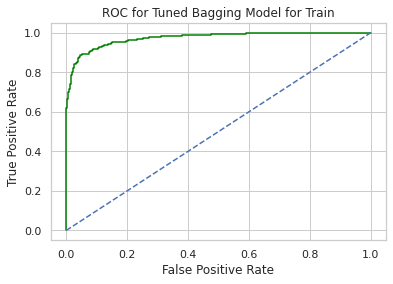

In [ ]:

BAGGRID_train_fpr, BAGGRID_train_tpr,_=roc_curve(y_train_bag,best_grid_bag.predict_proba(X_train_bag)[:,1])
plt.plot(BAGGRID_train_fpr,BAGGRID_train_tpr,color='green')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC for Tuned Bagging Model for Train')
BAGGRID_train_auc=roc_auc_score(y_train_bag,best_grid_bag.predict_proba(X_train_bag)[:,1])
print('Area under Curve is', BAGGRID_train_auc)

Area under Curve is 0.8926300037411149


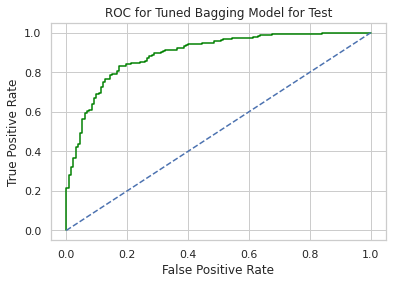

In [ ]:

BAGGRID_test_fpr, BAGGRID_test_tpr,_=roc_curve(y_test_bag,best_grid_bag.predict_proba(X_test_bag)[:,1])
plt.plot(BAGGRID_test_fpr,BAGGRID_test_tpr,color='green')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC for Tuned Bagging Model for Test')
BAGGRID_test_auc=roc_auc_score(y_test_bag,best_grid_bag.predict_proba(X_test_bag)[:,1])
print('Area under Curve is', BAGGRID_test_auc)

ROC -AUC scores:
Train set:97% | Test set:89%

In [ ]:
import matplotlib.colors as mcolors

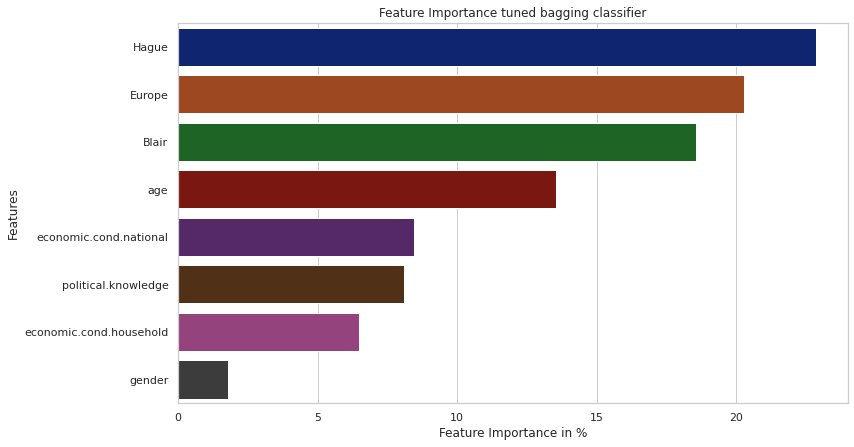

In [ ]:
x=pd.DataFrame(best_grid_bag.feature_importances_*100,index=X_train_rfcl.columns).sort_values(by=0,ascending=False)
plt.figure(figsize=(12,7))
sns.barplot(x[0],x.index,palette='dark')
plt.xlabel('Feature Importance in %')
plt.ylabel('Features')
plt.title('Feature Importance tuned bagging classifier')
plt.show()

Feature: 0, Score: 0.13520
Feature: 1, Score: 0.08450
Feature: 2, Score: 0.06471
Feature: 3, Score: 0.18541
Feature: 4, Score: 0.22836
Feature: 5, Score: 0.20265
Feature: 6, Score: 0.08110
Feature: 7, Score: 0.01806


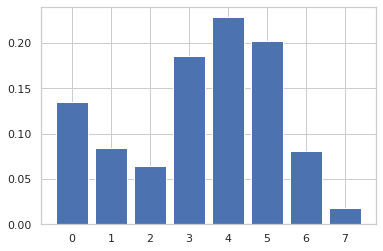

In [ ]:
# get importance
importance = best_grid_bag.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

Inferences:
1.Untuned bagging classifier gets highly overfit as evident from the huge difference in accuracy scores and ROC-Auc scores of train and test sets.
2.Hyperparameter tuning did rectify the issue of overfit ,and gave us the generlised model which is considered as valid model.
3.As per the model tuning on bagging model we come to see that Hague variable is the most important variable


# Ensemble Learning - GradientBoost

In [ ]:
X_train_gbcl,X_test_gbcl,y_train_gbcl,y_test_gbcl=train_test_split(X,y,test_size=.30,random_state=0)

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
gbcl = GradientBoostingClassifier(n_estimators = 500,random_state=100)
gbcl = gbcl.fit(X_train_gbcl, y_train_gbcl)

0.9566446748350612


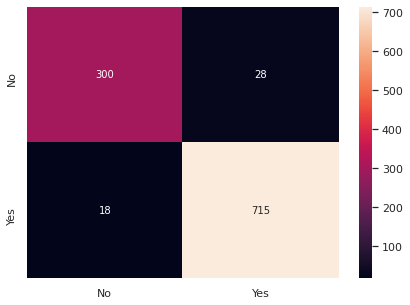

In [ ]:
y_predict = gbcl.predict(X_train_gbcl)
print(gbcl.score(X_train_gbcl, y_train_gbcl))
cm=metrics.confusion_matrix(y_train_gbcl, y_predict,labels=[0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in ["No","Yes"]],
                  columns = [i for i in ["No","Yes"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g')

0.8245614035087719


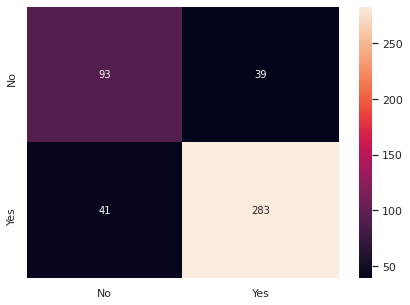

In [ ]:
y_predict = gbcl.predict(X_test_gbcl)
print(gbcl.score(X_test_gbcl, y_test_gbcl))
cm=metrics.confusion_matrix(y_test_gbcl, y_predict,labels=[0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in ["No","Yes"]],
                  columns = [i for i in ["No","Yes"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g')

In [ ]:
print(classification_report(y_train_gbcl,y_predict_train))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98       328
           1       1.00      0.99      0.99       733

    accuracy                           0.99      1061
   macro avg       0.99      0.99      0.99      1061
weighted avg       0.99      0.99      0.99      1061



In [ ]:
print(classification_report(y_test_gbcl,y_predict_test))

              precision    recall  f1-score   support

           0       0.64      0.69      0.66       132
           1       0.87      0.84      0.86       324

    accuracy                           0.80       456
   macro avg       0.76      0.77      0.76       456
weighted avg       0.80      0.80      0.80       456



Area under Curve Gradient Boosting Classifier is 0.991094899011746


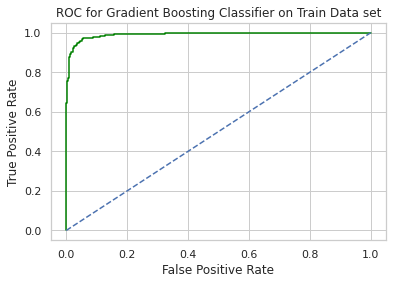

In [ ]:
train_gbcl_fpr, train_gbcl_tpr,_=roc_curve(y_train_gbcl,gbcl.predict_proba(X_train_gbcl)[:,1])
plt.plot(train_gbcl_fpr,train_gbcl_tpr,color='green')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC for Gradient Boosting Classifier on Train Data set')
train_gbcl_auc=roc_auc_score(y_train_gbcl,gbcl.predict_proba(X_train_gbcl)[:,1])
print('Area under Curve Gradient Boosting Classifier is', train_gbcl_auc)

Area under Curve Gradient Boosting Classifier is 0.8804479985035539


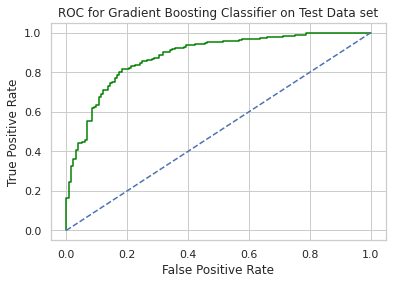

In [ ]:
test_gbcl_fpr, test_gbcl_tpr,_=roc_curve(y_test_gbcl,gbcl.predict_proba(X_test_gbcl)[:,1])
plt.plot(test_gbcl_fpr,test_gbcl_tpr,color='green')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC for Gradient Boosting Classifier on Test Data set')
test_gbcl_auc=roc_auc_score(y_test_gbcl,gbcl.predict_proba(X_test_gbcl)[:,1])
print('Area under Curve Gradient Boosting Classifier is', test_gbcl_auc)

ROC -AUC scores: Train set:99 % | Test set:88%

Feature: 0, Score: 0.14999
Feature: 1, Score: 0.05762
Feature: 2, Score: 0.05502
Feature: 3, Score: 0.18082
Feature: 4, Score: 0.29551
Feature: 5, Score: 0.15253
Feature: 6, Score: 0.09584
Feature: 7, Score: 0.01266


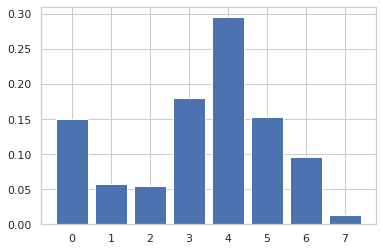

In [ ]:
# get importance
importance = gbcl.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

Inference:
1.Gender and economic condition household are the two least important predictors of votes.
2.Age again is the good predictor.
3.Untuned model suffers from overfitting issue .

Gradient Boosting(After Hyperparameter Tuning)

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
X_train_gbcl,X_test_gbcl,y_train_gbcl,y_test_gbcl=train_test_split(X,y,test_size=.30,random_state=0)

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
gbcl = GradientBoostingClassifier(n_estimators = 75,max_depth=5,learning_rate=0.05,min_samples_split=10,random_state=1)
gbcl = gbcl.fit(X_train_gbcl, y_train_gbcl)


In [ ]:
param_grid={'learning_rate':[0.05,0.075,0.1,0.2],'max_depth':[5,6,7,8],'min_impurity_split':[5,6,7,8,9,10],'n_estimators':[50,75],'random_state':[100]}

In [ ]:
grid_search = GridSearchCV(estimator=gbcl,param_grid = param_grid)
gbcl.get_params()


{'ccp_alpha': 0.0,
 'criterion': 'friedman_mse',
 'init': None,
 'learning_rate': 0.05,
 'loss': 'deviance',
 'max_depth': 5,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 10,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 75,
 'n_iter_no_change': None,
 'presort': 'deprecated',
 'random_state': 1,
 'subsample': 1.0,
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}

In [ ]:

grid_search.fit(X_train_gbcl,y_train_gbcl)


GridSearchCV(cv=None, error_score=nan,
             estimator=GradientBoostingClassifier(ccp_alpha=0.0,
                                                  criterion='friedman_mse',
                                                  init=None, learning_rate=0.05,
                                                  loss='deviance', max_depth=5,
                                                  max_features=None,
                                                  max_leaf_nodes=None,
                                                  min_impurity_decrease=0.0,
                                                  min_impurity_split=None,
                                                  min_samples_leaf=1,
                                                  min_samples_split=10,
                                                  min_weight_fraction_leaf=0.0,
                                                  n_estimators=75,
                                                  n_iter_...
                 

In [ ]:
best_grid_gb= grid_search.best_estimator_

In [ ]:
best_grid_gb

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.05, loss='deviance', max_depth=5,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=5,
                           min_samples_leaf=1, min_samples_split=10,
                           min_weight_fraction_leaf=0.0, n_estimators=50,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=100, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [ ]:

# Predicting the Training and Testing data
ytrain_predict = best_grid_gb.predict(X_train_gbcl)
ytest_predict = best_grid_gb.predict(X_test_gbcl)


In [ ]:
# Gradient Boosting Tuned Model Performance Evaluation on Training data
confusion_matrix(y_train_gbcl,ytrain_predict)


array([[  0, 328],
       [  0, 733]])

In [ ]:
ADABOOSTGRID_train_acc=best_grid_gb.score(X_train_gbcl,y_train_gbcl) 
ADABOOSTGRID_train_acc
print(classification_report(y_train_gbcl,ytrain_predict))


              precision    recall  f1-score   support

           0       0.00      0.00      0.00       328
           1       0.69      1.00      0.82       733

    accuracy                           0.69      1061
   macro avg       0.35      0.50      0.41      1061
weighted avg       0.48      0.69      0.56      1061



In [ ]:
ADABOOSTGRID_test_acc=best_grid_gb.score(X_test_gbcl,y_test_gbcl) 
ADABOOSTGRID_test_acc
print(classification_report(y_test_gbcl,ytest_predict))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       132
           1       0.71      1.00      0.83       324

    accuracy                           0.71       456
   macro avg       0.36      0.50      0.42       456
weighted avg       0.50      0.71      0.59       456



Area under Curve Gradient Boosting Classifier is 0.5


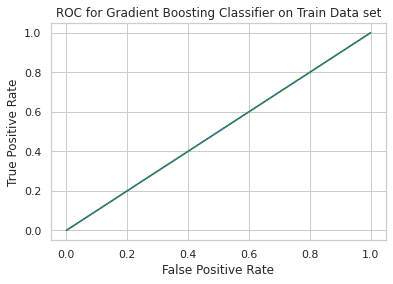

In [ ]:
train_gbcl_fpr, train_gbcl_tpr,_=roc_curve(y_train_gbcl,best_grid_gb.predict_proba(X_train_gbcl)[:,1])
plt.plot(train_gbcl_fpr,train_gbcl_tpr,color='green')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC for Gradient Boosting Classifier on Train Data set')
train_gbcl_auc=roc_auc_score(y_train_gbcl,best_grid_gb.predict_proba(X_train_gbcl)[:,1])
print('Area under Curve Gradient Boosting Classifier is', train_gbcl_auc)

Area under Curve  Tuned Gradient Boosting Classifier is 0.5


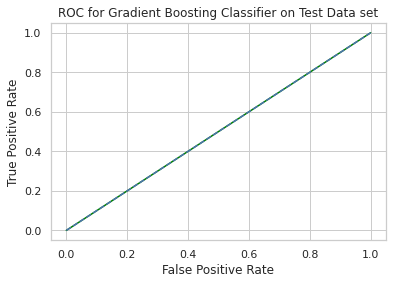

In [ ]:
test_gbcl_fpr, test_gbcl_tpr,_=roc_curve(y_test_gbcl,best_grid_gb.predict_proba(X_test_gbcl)[:,1])
plt.plot(test_gbcl_fpr,test_gbcl_tpr,color='green')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC for Gradient Boosting Classifier on Test Data set')
test_gbcl_auc=roc_auc_score(y_test_gbcl,best_grid_gb.predict_proba(X_test_gbcl)[:,1])
print('Area under Curve  Tuned Gradient Boosting Classifier is', test_gbcl_auc)



Best Model:
Model building is an iterative process.The model performance on both train and test data set can be improved using feature engineering,feature extraction,hyperparameter tuning (by changing the combinations of various parameters ).
A model has to match the business objective and hence various permutation and combinitions can be tried on to refine the model .
Below are the model that performed best on different metrics :

Linear models like logistic regression with recall for class 1 as 91% on test data and bagging classifier after hyperparameter tuning with recall for class 1 as 91 % outperforms the other models .
Feature important for Logistic regression : Hague(negative infuence ) and Blair(Positive influence) on target variable vote come out to  be the top two features .
Feature important for Bagging(After Hyperparameter Tuning) : Hague and Europe are top two important feature having impact on target variable vote .
While gender and economic condition household are the two least important feature for vote prediction.


Problem 2:

In this particular project, we are going to work on the inaugural corpora from the nltk in Python. We will be looking at the following speeches of the Presidents of the United States of America:

    President Franklin D. Roosevelt in 1941
    President John F. Kennedy in 1961
    President Richard Nixon in 1973





Code Snippet to extract the three speeches:

In [ ]:
#importing libraries and the data
import nltk
nltk.download('inaugural')
from nltk.corpus import inaugural
nltk.download('punkt')
inaugural.fileids()
import nltk
nltk.download('inaugural')
from nltk.corpus import inaugural
import numpy as np
import pandas as pd
import nltk
import random
import string

[nltk_data] Downloading package inaugural to /root/nltk_data...
[nltk_data]   Package inaugural is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package inaugural to /root/nltk_data...
[nltk_data]   Package inaugural is already up-to-date!


In [ ]:
!pip install wordcloud

In [ ]:
inaugural.fileids()

['1789-Washington.txt',
 '1793-Washington.txt',
 '1797-Adams.txt',
 '1801-Jefferson.txt',
 '1805-Jefferson.txt',
 '1809-Madison.txt',
 '1813-Madison.txt',
 '1817-Monroe.txt',
 '1821-Monroe.txt',
 '1825-Adams.txt',
 '1829-Jackson.txt',
 '1833-Jackson.txt',
 '1837-VanBuren.txt',
 '1841-Harrison.txt',
 '1845-Polk.txt',
 '1849-Taylor.txt',
 '1853-Pierce.txt',
 '1857-Buchanan.txt',
 '1861-Lincoln.txt',
 '1865-Lincoln.txt',
 '1869-Grant.txt',
 '1873-Grant.txt',
 '1877-Hayes.txt',
 '1881-Garfield.txt',
 '1885-Cleveland.txt',
 '1889-Harrison.txt',
 '1893-Cleveland.txt',
 '1897-McKinley.txt',
 '1901-McKinley.txt',
 '1905-Roosevelt.txt',
 '1909-Taft.txt',
 '1913-Wilson.txt',
 '1917-Wilson.txt',
 '1921-Harding.txt',
 '1925-Coolidge.txt',
 '1929-Hoover.txt',
 '1933-Roosevelt.txt',
 '1937-Roosevelt.txt',
 '1941-Roosevelt.txt',
 '1945-Roosevelt.txt',
 '1949-Truman.txt',
 '1953-Eisenhower.txt',
 '1957-Eisenhower.txt',
 '1961-Kennedy.txt',
 '1965-Johnson.txt',
 '1969-Nixon.txt',
 '1973-Nixon.txt',
 '1

To find the number of characters we use the raw() function,the number of words uisng word() function and sentences using sents() function using inaugural corpora.

In [ ]:
# To see the speech of leaders with the year can be seen using .raw()
inaugural.raw('1941-Roosevelt.txt')

'On each national day of inauguration since 1789, the people have renewed their sense of dedication to the United States.\n\nIn Washington\'s day the task of the people was to create and weld together a nation.\n\nIn Lincoln\'s day the task of the people was to preserve that Nation from disruption from within.\n\nIn this day the task of the people is to save that Nation and its institutions from disruption from without.\n\nTo us there has come a time, in the midst of swift happenings, to pause for a moment and take stock -- to recall what our place in history has been, and to rediscover what we are and what we may be. If we do not, we risk the real peril of inaction.\n\nLives of nations are determined not by the count of years, but by the lifetime of the human spirit. The life of a man is three-score years and ten: a little more, a little less. The life of a nation is the fullness of the measure of its will to live.\n\nThere are men who doubt this. There are men who believe that democr

In [ ]:
print(inaugural.words('1941-Roosevelt.txt'))
print(inaugural.words ('1961-Kennedy.txt'))
print(inaugural.words ('1973-Nixon.txt'))

['On', 'each', 'national', 'day', 'of', 'inauguration', ...]
['Vice', 'President', 'Johnson', ',', 'Mr', '.', ...]
['Mr', '.', 'Vice', 'President', ',', 'Mr', '.', ...]


In [ ]:
inaugural.raw('1961-Kennedy.txt')

'Vice President Johnson, Mr. Speaker, Mr. Chief Justice, President Eisenhower, Vice President Nixon, President Truman, reverend clergy, fellow citizens, we observe today not a victory of party, but a celebration of freedom -- symbolizing an end, as well as a beginning -- signifying renewal, as well as change. For I have sworn I before you and Almighty God the same solemn oath our forebears l prescribed nearly a century and three quarters ago.\n\nThe world is very different now. For man holds in his mortal hands the power to abolish all forms of human poverty and all forms of human life. And yet the same revolutionary beliefs for which our forebears fought are still at issue around the globe -- the belief that the rights of man come not from the generosity of the state, but from the hand of God.\n\nWe dare not forget today that we are the heirs of that first revolution. Let the word go forth from this time and place, to friend and foe alike, that the torch has been passed to a new gener

In [ ]:
inaugural.raw('1973-Nixon.txt')

'Mr. Vice President, Mr. Speaker, Mr. Chief Justice, Senator Cook, Mrs. Eisenhower, and my fellow citizens of this great and good country we share together:\n\nWhen we met here four years ago, America was bleak in spirit, depressed by the prospect of seemingly endless war abroad and of destructive conflict at home.\n\nAs we meet here today, we stand on the threshold of a new era of peace in the world.\n\nThe central question before us is: How shall we use that peace? Let us resolve that this era we are about to enter will not be what other postwar periods have so often been: a time of retreat and isolation that leads to stagnation at home and invites new danger abroad.\n\nLet us resolve that this will be what it can become: a time of great responsibilities greatly borne, in which we renew the spirit and the promise of America as we enter our third century as a nation.\n\nThis past year saw far-reaching results from our new policies for peace. By continuing to revitalize our traditional

In [ ]:
#creating a variable for each of the specific speeches to do the analysis
df_Roosevelt= inaugural.raw('1941-Roosevelt.txt')
df_Kennedy = inaugural.raw('1961-Kennedy.txt')
df_Nixon = inaugural.raw('1973-Nixon.txt')

In [ ]:
print(len(inaugural.raw('1941-Roosevelt.txt')))

7571


The number of character in '1941 Roosevelt.txt'of Inaugural is 7571.

In [ ]:
print(len(inaugural.raw('1961-Kennedy.txt')))

7618


The number of character in "1961 Kennedy.txt' of Inaugural is 7618.

In [ ]:
print(len(inaugural.raw('1973-Nixon.txt')))

9991


The number of character in '1961 Kennedy.txt'of Inaugural is 9991.

In [ ]:
print(len(inaugural.words('1941-Roosevelt.txt')))

1536


The number of words in '1941-Roosevelt.txt' are 1536.

In [ ]:
print(len(inaugural.words('1961-Kennedy.txt')))

1546


The number of words in '1961-Kennedy.txt' are 1546

In [ ]:
print(len(inaugural.words('1973-Nixon.txt')))

2028


The number of words in '1973-Nixon.txt' are 2028.

In [ ]:
print(len(inaugural.sents('1941-Roosevelt.txt')))

68


The number of sentences in '1941-Roosevelt' are 68.

In [ ]:
print(len(inaugural.sents('1961-Kennedy.txt')))

52


The number of sentences in '1961-Kennedy.txt' are 52.

In [ ]:
print(len(inaugural.sents('1973-Nixon.txt')))

69


The number of sentences in '1973-Nixon.txt' are 69.

Stopwords Removal

In [ ]:
import random
import string
from nltk.corpus import stopwords
nltk.download('stopwords')
from nltk.stem.porter import PorterStemmer

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Create a object named PS for the PorterStemmer

In [ ]:

PS = PorterStemmer()

In [ ]:
stopwords = nltk.corpus.stopwords.words('english') +list(string.punctuation)
stopwords.extend(["--"]) #,"us"])

Removing the stopword on '1941-Roosevelt's.txt' speech:

In [ ]:
Roosevelt_lower = (w.lower() for w in inaugural.words('1941-Roosevelt.txt'))
Roosevelt_clean = [word for word in Roosevelt_lower if word not in stopwords]
Roosevelt_clean_stem = [PS.stem(word) for word in Roosevelt_clean]
Roosevelt_freq = nltk.FreqDist(Roosevelt_clean_stem)

Removing the stopword on '1961-Kennedy's.txt'speech:

In [ ]:
Kennedy_lower = (w.lower() for w in inaugural.words('1961-Kennedy.txt'))
Kennedy_clean = [word for word in Kennedy_lower if word not in stopwords]
Kennedy_clean_stem = [PS.stem(word) for word in Kennedy_clean]
Kennedy_freq = nltk.FreqDist(Kennedy_clean_stem)

Removing the stopword on'1973-Nixon's.txt'speech:

In [ ]:

Nixon_lower = (w.lower() for w in inaugural.words('1973-Nixon.txt'))
Nixon_clean = [word for word in Nixon_lower if word not in stopwords]
Nixon_clean_stem = [PS.stem(word) for word in Nixon_clean]
Nixon_freq = nltk.FreqDist(Nixon_clean_stem)

In [ ]:
df_stopwords = pd.DataFrame(stopwords)
df_stopwords.head(5)

,0
0,i
1,me
2,my
3,myself
4,we


Words occuring most number of times alop with the top three words.

In [ ]:
print("The top three words in Roosevelt's Speech are :\n",Roosevelt_freq.most_common(3))

The top three words in Roosevelt's Speech are :
 [('nation', 17), ('know', 10), ('peopl', 9)]


In [ ]:
print("The top three words in Kennedy's Speech are :\n",Kennedy_freq.most_common(3))

The top three words in Kennedy's Speech are :
 [('let', 16), ('us', 12), ('power', 9)]


In [ ]:
print("The top three words in Nixon's Speech are :\n",Nixon_freq.most_common(3))

The top three words in Nixon's Speech are :
 [('us', 26), ('let', 22), ('america', 21)]


##Plotting word cloud

Wordclouds can be plotted using wordcloud python package .

The resulted wordcloud for the three speeches are illustrated below.

In [ ]:
df_roosevelt = pd.DataFrame({"Roosevelt":[inaugural.raw('1941-Roosevelt.txt')]})
df_kennedy =  pd.DataFrame({"Kennedy":[inaugural.raw('1961-Kennedy.txt')]})
df_nixon =  pd.DataFrame({"Nixon":[inaugural.raw('1973-Nixon.txt')]})

Sample text after stopwords removal

Stpwords are the frequently occuring words that do not add value to the analysis and hence should be removed .
NLTK package has an inbuilt list of 179 "stopwords".
We will use this list to remove any occurenec of such words from the documents .
Also it is advised to convert all the words to lower case ,remove all numerical characters ,and punctuation marks from the document as a part of pre-processing step .

In [ ]:
from wordcloud import WordCloud
words_roosevelt = ' '.join(df_roosevelt['Roosevelt'])
cleaned_word_roosevelt = " ".join([word for word in words_roosevelt.split()
                            if word not in stopwords
                            ])
cleaned_word_roosevelt


'On national day inauguration since 1789, people renewed sense dedication United States. In Washington\'s day task people create weld together nation. In Lincoln\'s day task people preserve Nation disruption within. In day task people save Nation institutions disruption without. To us come time, midst swift happenings, pause moment take stock recall place history been, rediscover may be. If not, risk real peril inaction. Lives nations determined count years, lifetime human spirit. The life man three-score years ten: little more, little less. The life nation fullness measure live. There men doubt this. There men believe democracy, form Government frame life, limited measured kind mystical artificial fate that, unexplained reason, tyranny slavery become surging wave future freedom ebbing tide. But Americans know true. Eight years ago, life Republic seemed frozen fatalistic terror, proved true. We midst shock acted. We acted quickly, boldly, decisively. These later years living years frui

Wordcloud for President "Rossevelt" inaugural address in 1941

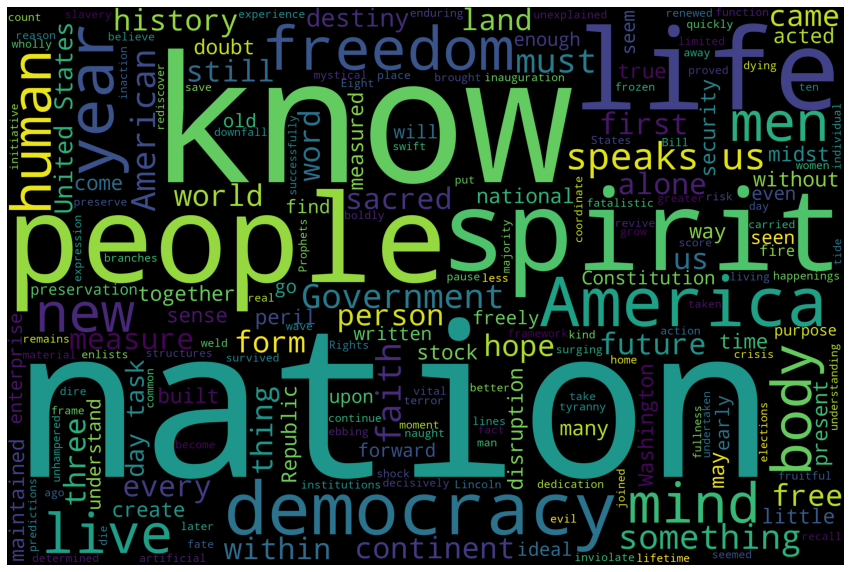

In [ ]:
from wordcloud import WordCloud
words_roosevelt = ' '.join(df_roosevelt['Roosevelt'])
cleaned_word_roosevelt = " ".join([word for word in words_roosevelt.split()
                            if word not in stopwords
                            ])
wordcloud_roosevelt = WordCloud(
                      background_color='black',
                      width=3000,
                      height=2000
                     ).generate(cleaned_word_roosevelt)
plt.figure(1,figsize=(15,12))
plt.imshow(wordcloud_roosevelt)
plt.axis('off')
plt.show()

Sample text after stopword removal

Wordcloud for President "Kennedy" inaugural address in 1961

In [ ]:


from wordcloud import WordCloud
words_kennedy = ' '.join(df_kennedy['Kennedy'])
cleaned_word_kennedy = " ".join([word for word in words_kennedy.split()
                            if word not in stopwords
                            ])
cleaned_word_kennedy

'Vice President Johnson, Mr. Speaker, Mr. Chief Justice, President Eisenhower, Vice President Nixon, President Truman, reverend clergy, fellow citizens, observe today victory party, celebration freedom symbolizing end, well beginning signifying renewal, well change. For I sworn I Almighty God solemn oath forebears l prescribed nearly century three quarters ago. The world different now. For man holds mortal hands power abolish forms human poverty forms human life. And yet revolutionary beliefs forebears fought still issue around globe belief rights man come generosity state, hand God. We dare forget today heirs first revolution. Let word go forth time place, friend foe alike, torch passed new generation Americans born century, tempered war, disciplined hard bitter peace, proud ancient heritage unwilling witness permit slow undoing human rights Nation always committed, committed today home around world. Let every nation know, whether wishes us well ill, shall pay price, bear burden, meet

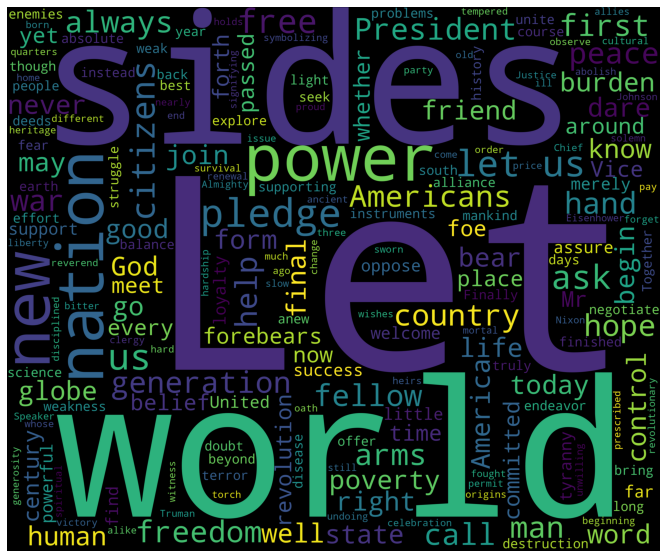

In [ ]:


from wordcloud import WordCloud
words_kennedy = ' '.join(df_kennedy['Kennedy'])
cleaned_word_kennedy = " ".join([word for word in words_kennedy.split()
                            if word not in stopwords
                            ])
wordcloud_kennedy = WordCloud(
                      background_color='black',
                      width=3000,
                      height=2500
                     ).generate(cleaned_word_kennedy)
plt.figure(1,figsize=(12,10))
plt.imshow(wordcloud_kennedy)
plt.axis('off')
plt.show()



Sample text after removal of stopwords

In [ ]:
from wordcloud import WordCloud
words_nixon = ' '.join(df_nixon['Nixon'])
cleaned_word_nixon = " ".join([word for word in words_nixon.split()
                            if word not in stopwords
                            ])
cleaned_word_nixon

'Mr. Vice President, Mr. Speaker, Mr. Chief Justice, Senator Cook, Mrs. Eisenhower, fellow citizens great good country share together: When met four years ago, America bleak spirit, depressed prospect seemingly endless war abroad destructive conflict home. As meet today, stand threshold new era peace world. The central question us is: How shall use peace? Let us resolve era enter postwar periods often been: time retreat isolation leads stagnation home invites new danger abroad. Let us resolve become: time great responsibilities greatly borne, renew spirit promise America enter third century nation. This past year saw far-reaching results new policies peace. By continuing revitalize traditional friendships, missions Peking Moscow, able establish base new durable pattern relationships among nations world. Because America\'s bold initiatives, 1972 long remembered year greatest progress since end World War II toward lasting peace world. The peace seek world flimsy peace merely interlude wa

Wordcloud for President "Nixon" inaugural address in 1973

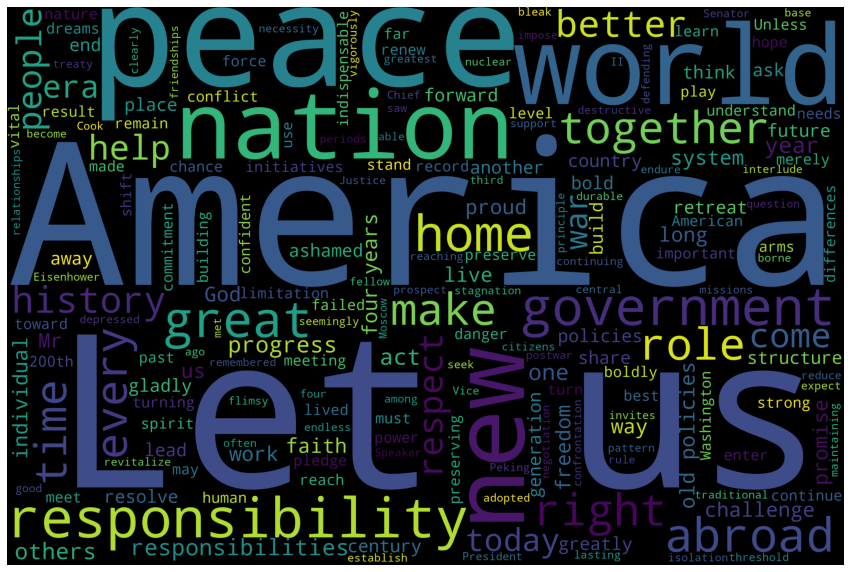

In [ ]:
from wordcloud import WordCloud
words_nixon = ' '.join(df_nixon['Nixon'])
cleaned_word_nixon = " ".join([word for word in words_nixon.split()
                            if word not in stopwords
                            ])
wordcloud_nixon = WordCloud(
                      background_color='black',
                      width=3000,
                      height=2000
                     ).generate(cleaned_word_nixon)
plt.figure(1,figsize=(15,12))
plt.imshow(wordcloud_nixon)
plt.axis('off')
plt.show()

END!!